# Sports Retailer Data Analytics Project

## Import packages and dataset

In [1]:
# Import packages

# For outputs of multiple lines to be shown
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Standard EDA packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# Load dataset into a dataframe
transactions = pd.read_csv(r"C:\DATA\Sports Retailer Project\Sports Retailer Transactions.csv")

## Data cleaning

In [3]:
# Having a quick first look at the dataset
transactions.head()
transactions.sample(10)

,no,the_transaction_id,the_date_transaction,sku_idr_sku,product_type,sports,but_name_business_unit,ctm_customer_id,the_to_type,f_qty_item,f_to_tax_in
0,1,7-1034-1034-20200708214026-101-8628,2020-07-08 21:40:26,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
1,2,7-1034-1034-20200708164857-211-1734,2020-07-08 16:48:57,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
2,3,7-1034-1034-20200701155410-102-6163,2020-07-01 15:54:10,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
3,4,7-1034-1034-20200713202706-102-7516,2020-07-13 20:27:06,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
4,5,7-1034-1034-20200727160812-211-4800,2020-07-27 16:08:12,0,NaN,NaN,City Square SG,NaN,offline,0,0.0


,no,the_transaction_id,the_date_transaction,sku_idr_sku,product_type,sports,but_name_business_unit,ctm_customer_id,the_to_type,f_qty_item,f_to_tax_in
302021,302022,7-1034-1034-20200801122732-206-6336,2020-08-01 12:27:32,2334072,BIKINI BOTTOM,SURFING,City Square SG,L3IQDDMPZF,offline,3,89.0
2782284,2782285,7-1034-1034-20200829191020-215-4316,2020-08-29 19:10:20,6982490,T-SHIRT,RUNNING,City Square SG,NaN,offline,2,31.5
3336980,3336981,7-1034-1034-20200915160850-207-9848,2020-09-15 16:08:50,1328325,BASELAYER BOTTO,SKI,City Square SG,NaN,offline,4,190.0
4016952,4016953,7-1034-1034-20201208180651-203-8315,2020-12-08 18:06:51,7227980,SWIMMING GOGGLE,SWIMMING,City Square SG,NaN,offline,1,29.5
3791793,3791794,7-1979-1979-20200729141517-203-8834,2020-07-29 14:15:17,7183402,TENNIS BALL,TENNIS,Decathlon Holland Village,JG9MA6JLCB,offline,2,127.5
2249539,2249540,7-1992-1992-20201009164222-202-432,2020-10-09 16:42:22,7286419,SKIPPING ROPE,FITNESS,Decathlon Velocity,NaN,offline,2,164.0
3005430,3005431,7-2128-2128-20200919233232-211-959,2020-09-19 23:32:32,7327213,T-SHIRT,RUNNING,Singapore Lab,S64DWJEHAV,offline,2,18.5
559717,559718,7-1034-1034-20200710165420-208-5404,2020-07-10 16:54:20,6968474,CARRY CASE,FIXT & FURNIT,City Square SG,NaN,offline,3,155.0
4774186,4774187,7-969-969-20201105200833-210-1272,2020-11-05 20:08:33,7004010,BIKE LIGHT,CYCLING,Bedok SG,DOVGYL88S9,offline,5,163.0
585893,585894,7-1034-1034-20201024144245-211-7931,2020-10-24 14:42:45,7460800,BAG,FIXT & FURNIT,City Square SG,HRANU42KLW,offline,3,34.5


In [4]:
# Checking column datatypes
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5496751 entries, 0 to 5496750
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   no                      int64  
 1   the_transaction_id      object 
 2   the_date_transaction    object 
 3   sku_idr_sku             int64  
 4   product_type            object 
 5   sports                  object 
 6   but_name_business_unit  object 
 7   ctm_customer_id         object 
 8   the_to_type             object 
 9   f_qty_item              int64  
 10  f_to_tax_in             float64
dtypes: float64(1), int64(3), object(7)
memory usage: 461.3+ MB


### Assigning proper data types to columns

In [5]:
# Converting all columns to their proper data types
transactions['the_date_transaction'] = pd.to_datetime(transactions['the_date_transaction'])
transactions = transactions.astype({"the_date_transaction": 'datetime64[ns]'})

In [6]:
# Recheck
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5496751 entries, 0 to 5496750
Data columns (total 11 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   no                      int64         
 1   the_transaction_id      object        
 2   the_date_transaction    datetime64[ns]
 3   sku_idr_sku             int64         
 4   product_type            object        
 5   sports                  object        
 6   but_name_business_unit  object        
 7   ctm_customer_id         object        
 8   the_to_type             object        
 9   f_qty_item              int64         
 10  f_to_tax_in             float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 461.3+ MB


In [7]:
# Dropping the unamed index column
transactions.drop(transactions.columns[0], axis=1, inplace=True)

### Changing column names

In [8]:
# Renaming columns
transactions.rename(columns={'the_transaction_id': 'id_transac', 'the_date_transaction': 'date_transac', \
                             'sku_idr_sku': 'sku_id', 'but_name_business_unit': 'store_name', 'ctm_customer_id': 'member_id', \
                             'the_to_type': 'transac_type', 'f_qty_item': 'item_qty', 'f_to_tax_in': 'transac_value'}, inplace=True)

transactions.sample(7)

,id_transac,date_transac,sku_id,product_type,sports,store_name,member_id,transac_type,item_qty,transac_value
2512657,7-969-969-20201215165834-204-5314,2020-12-15 16:58:34,7274483,TROUSERS,DANCE,Bedok SG,DLZ43LJBGJ,offline,2,44.5
1838337,7-2128-2128-20200709220646-209-3339,2020-07-09 22:06:46,175742,PILATES MAT,PILATES,Singapore Lab,NaN,offline,4,72.0
2199775,7-1871-1871-20201031184223-208-1446,2020-10-31 18:42:23,7329021,SKIPPING ROPE,FITNESS,Joo Koon,NaN,offline,3,116.5
1588972,7-2128-2128-20201008194249-209-2381,2020-10-08 19:42:49,2196741,3/4 CYCLING BIB,CYCLING,Singapore Lab,6I546SQM7A,offline,2,45.0
5072781,7-2459-2459-20201218132106-205-7275,2020-12-18 13:21:06,7253075,BACKPACK,MOUNTAIN,Centre Point,NaN,offline,5,9.0
1005477,7-1871-1871-20201223161900-203-1722,2020-12-23 16:19:00,7195128,TANK,BODYBUILDING,Joo Koon,HPUBMDRQ01,offline,2,22.5
1533186,7-1871-1871-20200905201414-205-8503,2020-09-05 20:14:14,7210351,SHORT-SLEEVE JE,CYCLING,Joo Koon,GDNLZ5WZ25,offline,3,110.5


### Checking for outliers

In [9]:
# Checking descriptive stats. Not very useful here.
transactions.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,sku_id,item_qty,transac_value
count,5496751.00000,5496751.00000,5496751.00000
mean,5803890.09797,2.97953,61.96055
std,2466494.60374,1.51852,57.52038
min,0.00000,0.00000,0.00000
25%,2500415.00000,2.00000,24.00000
50%,7204275.00000,3.00000,40.00000
75%,7328256.00000,4.00000,85.50000
max,7542224.00000,501.00000,4318.00000


In [10]:
# Those max values look odd. Checking highest item_qty
transactions.sort_values(by=['item_qty'], ascending = False).head(10)

,id_transac,date_transac,sku_id,product_type,sports,store_name,member_id,transac_type,item_qty,transac_value
4680679,7-969-969-20201218155532-215-8879,2020-12-18 15:55:32,7099912,WATER BOTTLE,MOUNTAIN,Website,ALLOBGQXHV,online,501,1521.5
5124886,7-969-969-20201214182533-215-8711,2020-12-14 18:25:33,7253075,BACKPACK,MOUNTAIN,Website,ALLOBGQXHV,online,501,508.0
5129610,7-969-969-20201230161713-216-9,2020-12-30 16:17:13,7253075,BACKPACK,MOUNTAIN,Website,0TIM7R89KV,online,142,147.0
1896215,7-2128-2128-20201014083400-220-2977,2020-10-14 08:34:00,2483237,ELASTIC BAND,PILATES,Website,8GGCE4VAMT,online,123,1443.0
4626224,7-2459-2459-20201111213828-216-2663,2020-11-11 21:38:28,7099912,WATER BOTTLE,MOUNTAIN,Website,NCG5IJ81D3,online,121,341.9
5122528,7-969-969-20201203112549-216-7049,2020-12-03 11:25:49,7253075,BACKPACK,MOUNTAIN,Website,KYAU0HVMPE,online,121,128.0
169208,7-2459-2459-20201111205217-216-2646,2020-11-11 20:52:17,6980508,TABLE TENNIS BA,TABLE TENNIS,Website,YGU1LN9IKO,online,121,253.6
4657691,7-969-969-20201015123156-216-2566,2020-10-15 12:31:56,7099912,WATER BOTTLE,MOUNTAIN,Website,R12ZLAOPU4,online,115,366.5
4951678,7-2128-2128-20200912173257-220-1204,2020-09-12 17:32:57,7217369,BACKPACK,MOUNTAIN,Website,2961P3P67K,online,110,439.0
5128334,7-969-969-20201224182625-216-9389,2020-12-24 18:26:25,7253075,BACKPACK,MOUNTAIN,Website,KXLN073HBD,online,107,114.0


In [11]:
# Zooming in on the 2 transaction IDs where 501 of a particular item were ordered. They were both by the same member.
# Conclusion: the transactions are unusual, but not impossible. Unable to verify with main source. Will leave them in.

transactions.loc[transactions['id_transac'] == '7-969-969-20201218155532-215-8879']
transactions.loc[transactions['id_transac'] == '7-969-969-20201214182533-215-8711']

transactions.loc[transactions['member_id'] == 'ALLOBGQXHV'].sort_values(by = 'item_qty', ascending = False).head(10)

,id_transac,date_transac,sku_id,product_type,sports,store_name,member_id,transac_type,item_qty,transac_value
4680679,7-969-969-20201218155532-215-8879,2020-12-18 15:55:32,7099912,WATER BOTTLE,MOUNTAIN,Website,ALLOBGQXHV,online,501,1521.5


,id_transac,date_transac,sku_id,product_type,sports,store_name,member_id,transac_type,item_qty,transac_value
5124886,7-969-969-20201214182533-215-8711,2020-12-14 18:25:33,7253075,BACKPACK,MOUNTAIN,Website,ALLOBGQXHV,online,501,508.0


,id_transac,date_transac,sku_id,product_type,sports,store_name,member_id,transac_type,item_qty,transac_value
5124886,7-969-969-20201214182533-215-8711,2020-12-14 18:25:33,7253075,BACKPACK,MOUNTAIN,Website,ALLOBGQXHV,online,501,508.0
4680679,7-969-969-20201218155532-215-8879,2020-12-18 15:55:32,7099912,WATER BOTTLE,MOUNTAIN,Website,ALLOBGQXHV,online,501,1521.5
4668100,7-969-969-20200701135348-215-12,2020-07-01 13:53:48,1561311,CUTLERY,MOUNTAIN,Website,ALLOBGQXHV,online,6,194.9
3603089,7-969-969-20200810212029-215-885,2020-08-10 21:20:29,7339228,TANK,GYMNASTICS,Website,ALLOBGQXHV,online,6,17.0
5149299,7-969-969-20201010154558-216-2226,2020-10-10 15:45:58,548118,DART,TARGET,Website,ALLOBGQXHV,online,5,20.0
5136587,7-1871-1871-20201126152037-114-3310,2020-11-26 15:20:37,7117440,DART,TARGET,Website,ALLOBGQXHV,online,5,15.5
5112895,7-969-969-20201120220455-102-9380,2020-11-20 22:04:55,7253075,BACKPACK,MOUNTAIN,Bedok SG,ALLOBGQXHV,offline,5,9.0
5112891,7-969-969-20201120220455-102-9380,2020-11-20 22:04:55,7253075,BACKPACK,MOUNTAIN,Bedok SG,ALLOBGQXHV,offline,5,9.0
5112878,7-969-969-20201120220455-102-9380,2020-11-20 22:04:55,7253075,BACKPACK,MOUNTAIN,Bedok SG,ALLOBGQXHV,offline,5,9.0
4343021,7-969-969-20200915174203-216-505,2020-09-15 17:42:03,7364235,TOWEL,SWIMMING,Website,ALLOBGQXHV,online,5,48.5


In [12]:
# Looking into highest value transaction lines. Nothing out of the ordinary.
transactions.sort_values(by=['transac_value'], ascending = False).head(10)

,id_transac,date_transac,sku_id,product_type,sports,store_name,member_id,transac_type,item_qty,transac_value
1645622,7-2459-2459-20201120124832-216-3636,2020-11-20 12:48:32,7239821,ROAD BIKE,CYCLING,Website,M2WZS1BVFF,online,3,4318.0
2685287,7-1871-1871-20201227194643-114-8319,2020-12-27 19:46:43,7242788,HYBRID BIKE,CYCLING,Website,9T4FT9JQG4,online,14,2666.5
3287413,7-1871-1871-20200809132857-114-8208,2020-08-09 13:28:57,7229996,MOUNTAIN BIKE,CYCLING,Website,MP6HPLFM7C,online,3,2532.5
3283647,7-1871-1871-20200703164525-114-4993,2020-07-03 16:45:25,7229996,MOUNTAIN BIKE,CYCLING,Website,8VHS5ZG7PK,online,4,2532.5
3286638,7-1871-1871-20200718104705-114-6172,2020-07-18 10:47:05,7229996,MOUNTAIN BIKE,CYCLING,Website,JJ211XC6YZ,online,2,2532.5
3285952,7-1871-1871-20200724131725-114-6778,2020-07-24 13:17:25,7229996,MOUNTAIN BIKE,CYCLING,Website,Z392PP3234,online,2,2532.5
1550145,7-1871-1871-20201119130714-114-2208,2020-11-19 13:07:14,7097070,ROAD BIKE,CYCLING,Website,BWY89KHMXX,online,3,2357.5
1544352,7-1871-1871-20201213133020-114-6034,2020-12-13 13:30:20,7100509,ROAD BIKE,CYCLING,Website,D9AO02UFOA,online,4,2313.0
1643144,7-2459-2459-20201225164633-216-6325,2020-12-25 16:46:33,7244660,ROAD BIKE,CYCLING,Website,3DC92DKTP3,online,3,2293.5
1552960,7-1871-1871-20201126152101-114-3412,2020-11-26 15:21:01,7244660,ROAD BIKE,CYCLING,Website,WCF9Q1P7WZ,online,1,2293.5


### Removing nulls

In [13]:
# Checking for nulls
transactions.isna().sum()

id_transac             0
date_transac           0
sku_id                 0
product_type         878
sports               656
store_name             0
member_id        2059281
transac_type           0
item_qty               0
transac_value          0
dtype: int64

In [14]:
### Commented out this section because outputs took up a lot of space.

## Checked the 'product_type' and 'sports' columns that contained nulls, and cross checked with sKU and turnover column.
## Through these checks, decided that removing all rows where SKU is 0 removes all "true" nulls.

## All rows where 'sports' is NA, 'product_type' is also NA
## Appears that all rows have 0 turnover as well 
# transactions[transactions['sports'].isna()].shape
# transactions[transactions['product_type'].isna()].shape
# transactions[(transactions['product_type'].isna()) & (transactions['sports'].isna())]

## Only 3 rows where both product_type and sports are null, but SKU and turnover are not 0.
# transactions[(transactions['product_type'].isna()) & (transactions['sports'].isna()) & (transactions['sku_idr_sku'] != "0")]

# transactions[(transactions['product_type'].isna()) & (transactions['sports'].notna())]

## Matches sports nulls - the 3 rows
# transactions[transactions['sku_idr_sku'] == "0"]

In [15]:
# Removing the nulls
transactions.shape
transactions = transactions[transactions['sku_id'] != 0]
transactions.shape
transactions.head(5)

(5496751, 10)

(5496098, 10)

,id_transac,date_transac,sku_id,product_type,sports,store_name,member_id,transac_type,item_qty,transac_value
53,7-1034-1034-20200829140007-102-4073,2020-08-29 14:00:07,634928,NaN,NaN,City Square SG,NaN,offline,3,121.5
91,7-1034-1034-20201006104818-102-705,2020-10-06 10:48:18,2014743,NaN,NaN,City Square SG,8VSGYLTXL2,offline,1,29.5
475,7-2459-2459-20200923214628-102-851,2020-09-23 21:46:28,1718267,NaN,NaN,Website,E1OWOWPT1K,online,5,110.5
656,7-2128-2128-20201128223450-101-8145,2020-11-28 22:34:50,1795606,UNDEFINED,RUGBY,Singapore Lab,NaN,offline,4,45.0
657,7-1034-1034-20200702133138-212-6643,2020-07-02 13:31:38,7200628,SHOES,RUNNING,City Square SG,NaN,offline,3,112.0


### Removing duplicates

In [16]:
# Checking for duplicates.
duplicates = transactions[transactions.duplicated(keep = False)]
duplicates.sort_values(by = ['id_transac', 'sku_id']).head(10)
duplicates.shape

# Decided that duplicates can be removed, since transaction ID, SKU, Qty, and turnover are the same.
# In the same transaction, there should be only 1 of the SKU, and the Qty should just stack.

,id_transac,date_transac,sku_id,product_type,sports,store_name,member_id,transac_type,item_qty,transac_value
2777351,7-1034-1034-20200701102920-209-1072,2020-07-01 10:29:20,7205942,T-SHIRT,RUNNING,City Square SG,KSNJV2JT2Z,offline,2,39.5
2777352,7-1034-1034-20200701102920-209-1072,2020-07-01 10:29:20,7205942,T-SHIRT,RUNNING,City Square SG,KSNJV2JT2Z,offline,2,39.5
3722788,7-1034-1034-20200701104052-206-659,2020-07-01 10:40:52,970015,HEADBAND,TENNIS,City Square SG,H5CPGCPW0Z,offline,3,33.5
3722789,7-1034-1034-20200701104052-206-659,2020-07-01 10:40:52,970015,HEADBAND,TENNIS,City Square SG,H5CPGCPW0Z,offline,3,33.5
4786358,7-1034-1034-20200701104052-206-659,2020-07-01 10:40:52,2027891,BACKPACK,MOUNTAIN,City Square SG,H5CPGCPW0Z,offline,5,4.0
4786359,7-1034-1034-20200701104052-206-659,2020-07-01 10:40:52,2027891,BACKPACK,MOUNTAIN,City Square SG,H5CPGCPW0Z,offline,5,4.0
29987,7-1034-1034-20200701110733-215-8337,2020-07-01 11:07:33,1929742,YOGA BLOCK,YOGA,City Square SG,NaN,offline,3,43.0
29988,7-1034-1034-20200701110733-215-8337,2020-07-01 11:07:33,1929742,YOGA BLOCK,YOGA,City Square SG,NaN,offline,3,43.0
29989,7-1034-1034-20200701110733-215-8337,2020-07-01 11:07:33,1929742,YOGA BLOCK,YOGA,City Square SG,NaN,offline,3,43.0
2514049,7-1034-1034-20200701112435-209-1076,2020-07-01 11:24:35,7002804,WATER POUCH,MOUNTAIN,City Square SG,NaN,offline,4,18.0


(270862, 10)

In [17]:
# Removing duplicates
transactions.shape
transactions = transactions.drop_duplicates(keep = 'first')
transactions.shape

(5496098, 10)

(5334991, 10)

In [18]:
# Looking at what the different product_type and sports categories are.

transactions['product_type'].nunique()
transactions['sports'].nunique()

pd.set_option('max_seq_item', None)
print(transactions['sports'].unique().tolist())

790

39

[nan, 'RUGBY', 'RUNNING', 'MOUNTAIN', 'YOGA', 'KITE', 'TABLE TENNIS', 'NETBALL', 'SURFING', 'TEAMSPORT', 'FIXT & FURNIT', 'BOXING', 'CRICKET', 'WORKSHOP AND SERVICES', 'BADMINTON', 'WATERSPORT', 'BODYBUILDING', 'CYCLING', 'HOCKEY', 'HANDBALL', 'HUNTING', 'TENNIS', 'URBAN', 'VOLLEYBALL', 'SKATEBOARD', 'PILATES', 'FITNESS', 'SAILING', 'SQUASH', 'DANCE', 'BASEBALL', 'SKI', 'GOLF', 'GYMNASTICS', 'SWIMMING', 'NUTRITION ', 'TARGET', 'FOOTBALL', 'HORSE RIDING', 'FISHING']


## Data Transformation

### Membership boolean column

In [19]:
# Creating a new boolean column to indicate if the row is by a member or not.
null_mask = transactions['member_id'].notnull()
transactions['ismember'] = null_mask.astype(int)
transactions.sample(10)

,id_transac,date_transac,sku_id,product_type,sports,store_name,member_id,transac_type,item_qty,transac_value,ismember
209653,7-1871-1871-20201121125639-206-3635,2020-11-21 12:56:39,2191728,WRIST SUPPORT,NETBALL,Joo Koon,HM3SE8I6GA,offline,2,14.0,1
2904158,7-1871-1871-20200919141643-210-81,2020-09-19 14:16:43,6976052,BOXER SHORTS,RUNNING,Joo Koon,Q5FICB7JFT,offline,1,24.0,1
2094835,7-969-969-20201227163740-208-4697,2020-12-27 16:37:40,2461867,SCOOTER,URBAN,Bedok SG,NaN,offline,1,42.5,0
101487,7-2459-2459-20201217180133-204-4681,2020-12-17 18:01:33,1929742,YOGA BLOCK,YOGA,Centre Point,NaN,offline,5,43.0,0
4049577,7-1871-1871-20201011132533-114-5901,2020-10-11 13:25:33,7370577,TOWEL,SWIMMING,Website,4M7UUWJDMG,online,3,69.0,1
2866676,7-1871-1871-20200815170047-210-6858,2020-08-15 17:00:47,1884663,SMARTPHONE HOLDER,RUNNING,Joo Koon,NaN,offline,3,46.0,0
3959645,7-1034-1034-20200718171218-211-3286,2020-07-18 17:12:18,7245814,TOWEL,SWIMMING,City Square SG,NaN,offline,2,10.5,0
3577293,7-2459-2459-20201219220518-209-3478,2020-12-19 22:05:18,7336555,TROUSERS,GYMNASTICS,Centre Point,P2LHII0W5Y,offline,1,6.0,1
2583910,7-2128-2128-20200915084030-217-9053,2020-09-15 08:40:30,1065885,GLOVES,MOUNTAIN,Website,02EQS996KZ,online,6,29.0,1
931899,7-1871-1871-20200926185418-205-2136,2020-09-26 18:54:18,7367613,SWIM BOTTOM,WATERSPORT,Joo Koon,5WCW6BPGG0,offline,3,30.0,1


### Categorising stores by channel type

In [20]:
ex = ['Bedok SG', 'City Square SG', 'Joo Koon', 'Singapore Lab', 'Centre Point']
cc = ['Chinatown Point', 'Decathlon Holland Village', 'Decathlon Velocity', 'SunPlaza', \
      'Tampines Mall', 'Tiong Bahru Plaza', 'Waterway Point']

transactions['channel'] = ['Experience' if x in ex else 'Click & Collect' \
                       if x in cc else 'Online' for x in transactions['store_name']]

In [21]:
transactions.sample(10)

,id_transac,date_transac,sku_id,product_type,sports,store_name,member_id,transac_type,item_qty,transac_value,ismember,channel
2065832,7-969-969-20201130191645-203-4300,2020-11-30 19:16:45,246698,T-SHIRT,PILATES,Bedok SG,NaN,offline,5,63.5,0,Experience
2149338,7-1871-1871-20200702153143-210-2066,2020-07-02 15:31:43,7268376,TROUSERS,FITNESS,Joo Koon,17FPXEEYRK,offline,1,75.5,1,Experience
4649411,7-969-969-20200816125530-215-984,2020-08-16 12:55:30,7373241,SOCKS,MOUNTAIN,Website,0HPSRZFKIM,online,6,16.0,1,Online
4581856,7-2128-2128-20201213153121-220-5966,2020-12-13 15:31:21,616513,T-SHIRT,MOUNTAIN,Website,DQCNBRUE9F,online,3,42.5,1,Online
834884,7-1034-1034-20201221184053-215-6350,2020-12-21 18:40:53,1034678,PLASTIC SHUTTLE,BADMINTON,City Square SG,F0VEG5WEDO,offline,2,11.5,1,Experience
4915698,7-2128-2128-20200715210301-203-9168,2020-07-15 21:03:01,7200852,BACKPACK,MOUNTAIN,Singapore Lab,NaN,offline,2,85.5,0,Experience
3309905,7-2128-2128-20201220133908-206-8646,2020-12-20 13:39:08,7344929,HELMET,CYCLING,Singapore Lab,GYS6Q4OPPC,offline,3,27.5,1,Experience
5298947,7-2459-2459-20201228183616-207-9896,2020-12-28 18:36:16,7341172,FOOTBALL BOOTS,FOOTBALL,Centre Point,9BXCWJWGZP,offline,2,47.0,1,Experience
654131,7-2128-2128-20200811154037-207-2153,2020-08-11 15:40:37,7460800,BAG,FIXT & FURNIT,Singapore Lab,NaN,offline,1,34.5,0,Experience
3269103,7-969-969-20201103200136-209-6661,2020-11-03 20:01:36,7334650,BOXER SHORTS,RUNNING,Bedok SG,QXW3QSOC1T,offline,3,29.0,1,Experience


### Creating individual dataframes for each channel type

In [22]:
experiencedf = transactions[transactions['channel'] == "Experience"].copy()
ccdf = transactions[transactions['channel'] == "Click & Collect"].copy()
onlinedf = transactions[transactions['channel'] == "Online"].copy()

## 1. Finding average basket sizes and value of members vs non-members

In [23]:
# Creating a filtered dataframe with only columns relevant to find average baskets.
baskets = transactions.filter(['id_transac','store_name','item_qty','transac_value','ismember'], axis=1).copy()
baskets.sample(5)

,id_transac,store_name,item_qty,transac_value,ismember
3027713,7-2128-2128-20200830195735-205-1105,Singapore Lab,4,103.5,1
1843480,7-2128-2128-20200823214939-207-3994,Singapore Lab,4,23.0,1
5356821,7-1871-1871-20200807174754-212-9476,Joo Koon,3,194.5,1
428598,7-2128-2128-20201108190922-205-6504,Singapore Lab,3,5.0,1
4704517,7-1871-1871-20201030211018-207-7219,Joo Koon,3,16.0,0


In [24]:
# Splitting into 2 dataframes, for members and non-members.
basketsmem = baskets[baskets['ismember'] == 1].copy()
basketsnon = baskets[baskets['ismember'] == 0].copy()

In [25]:
# MEMBERS - Grouping by transaction IDs and stores, and summing items and turnover of transaction.
groupedm = basketsmem.groupby(['id_transac', 'store_name']).sum().reset_index()
groupedm.head()

,id_transac,store_name,item_qty,transac_value,ismember
0,7-1034-1034-20200701100516-207-8331,City Square SG,2,80.0,1
1,7-1034-1034-20200701102336-213-877,City Square SG,14,382.0,3
2,7-1034-1034-20200701102920-209-1072,City Square SG,7,256.9,4
3,7-1034-1034-20200701103130-206-658,City Square SG,6,66.5,3
4,7-1034-1034-20200701103233-209-1073,City Square SG,21,450.5,6


In [26]:
# NON-MEMBERS - Grouping by transaction IDs and stores, and summing items and turnover of transaction.
groupedn = basketsnon.groupby(['id_transac', 'store_name']).sum().reset_index()
groupedn.head()

,id_transac,store_name,item_qty,transac_value,ismember
0,7-1034-1034-20200701102229-206-657,City Square SG,11,204.5,0
1,7-1034-1034-20200701102316-215-8331,City Square SG,12,135.5,0
2,7-1034-1034-20200701102419-209-1071,City Square SG,9,25.0,0
3,7-1034-1034-20200701102747-208-4243,City Square SG,6,195.0,0
4,7-1034-1034-20200701103247-102-6088,City Square SG,6,57.0,0


### Average basket size and values of members and non-members by store

### Members

In [27]:
# MEMBERS - Group by stores and finding average basket size and value for each store.
memavg = groupedm.groupby('store_name').mean().reset_index()
memavg.drop('ismember', axis=1, inplace=True)

# Round to nearest integer for qty and 2 dp for value.
memavg['item_qty'] = memavg['item_qty'].round(0)
memavg['transac_value'] = memavg['transac_value'].round(2)
memavg['item_qty'] = memavg['item_qty'].astype('int')
memavg

,store_name,item_qty,transac_value
0,Bedok SG,13,277.98
1,Centre Point,11,224.11
2,Chinatown Point,6,111.67
3,City Square SG,11,226.47
4,Decathlon Holland Village,7,146.21
5,Decathlon Velocity,7,131.69
6,Joo Koon,14,281.51
7,Singapore Lab,13,276.95
8,SunPlaza,7,134.69
9,Tampines Mall,7,134.70


### Non-members

In [28]:
# NON-MEMBERS - Group by stores and finding average basket size and value for each store.
nonavg = groupedn.groupby('store_name').mean().reset_index()
nonavg.drop('ismember', axis=1, inplace=True)

# Round to nearest integer for qty and 2 dp for value.
nonavg['item_qty'] = nonavg['item_qty'].round(0)
nonavg['transac_value'] = nonavg['transac_value'].round(2)
nonavg['item_qty'] = nonavg['item_qty'].astype('int')
nonavg

,store_name,item_qty,transac_value
0,Bedok SG,11,226.74
1,Centre Point,9,182.33
2,Chinatown Point,5,99.03
3,City Square SG,9,182.38
4,Decathlon Holland Village,6,129.59
5,Decathlon Velocity,6,115.95
6,Joo Koon,11,212.36
7,Singapore Lab,11,229.37
8,SunPlaza,5,113.42
9,Tampines Mall,6,115.72


### Average basket size and value visualisations

#### Member vs non-member basket size and value compared

In [29]:
# Combining the two aggregated dfs
memavg['member'] = 'Members'
nonavg['member'] = 'Non-members'
groupedbasket = pd.concat([memavg, nonavg], ignore_index=True)

<AxesSubplot:xlabel='store_name', ylabel='item_qty'>

Text(0.5, 1.0, 'Average basket size of members vs non-members by store')

Text(0.5, 0, '')

Text(0, 0.5, '')

<AxesSubplot:xlabel='store_name', ylabel='transac_value'>

Text(0.5, 1.0, 'Average basket value of members vs non-members by store')

Text(0.5, 0, '')

Text(0, 0.5, '')

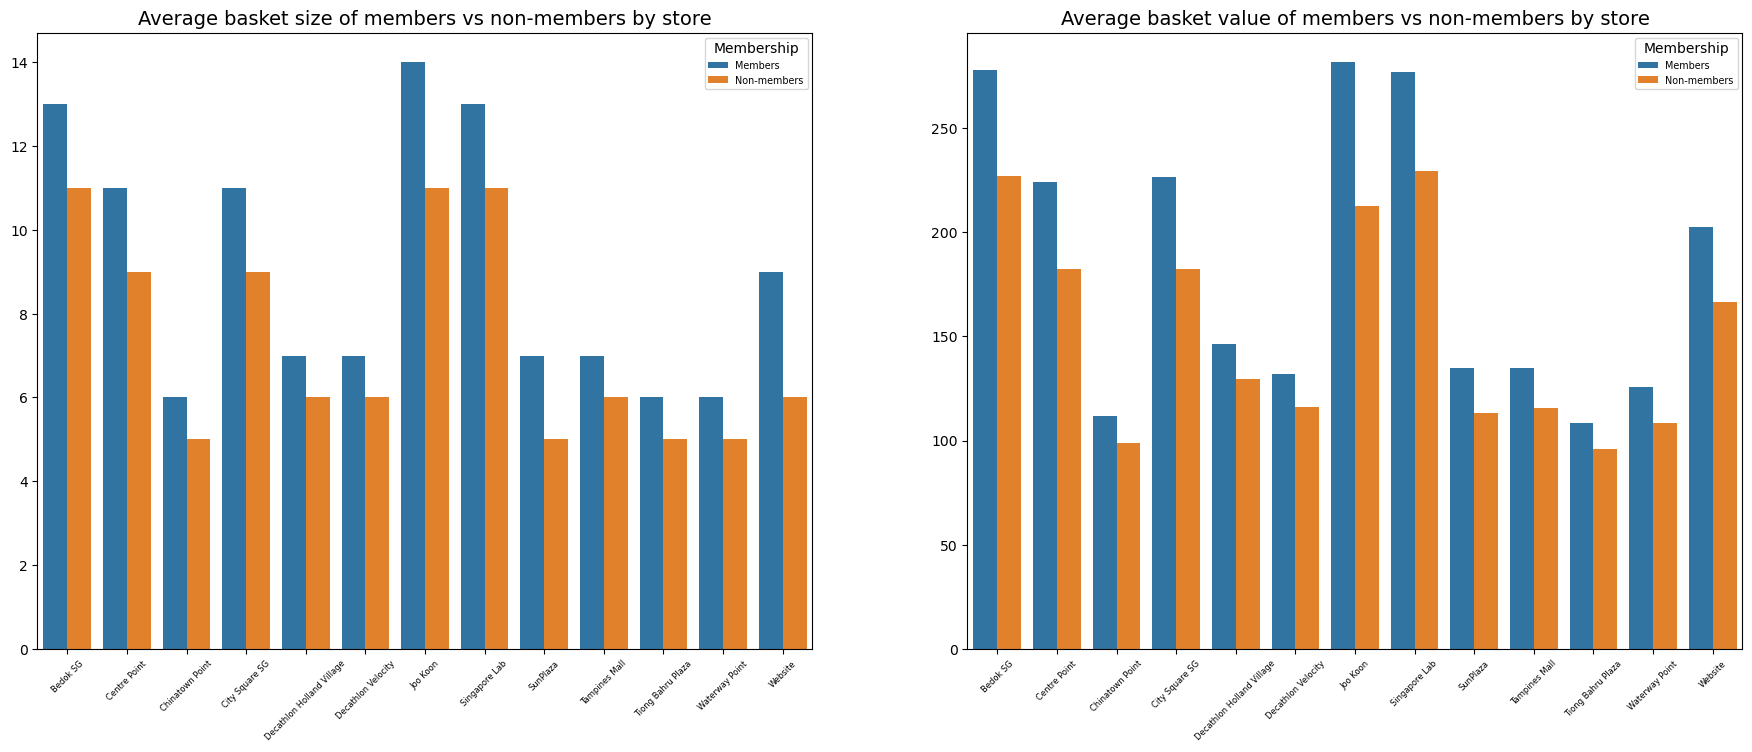

In [30]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Average basket size
sns.barplot(data=groupedbasket, x='store_name', y='item_qty', hue = 'member', ax=ax[0])
ax[0].set_title('Average basket size of members vs non-members by store', fontsize='14')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].tick_params(axis='x', rotation=45, labelsize = 6)
ax[0].legend(title = 'Membership', fontsize = 'x-small')

# Average basket value
sns.barplot(data=groupedbasket, x='store_name', y='transac_value', hue = 'member', ax=ax[1])
ax[1].set_title('Average basket value of members vs non-members by store', fontsize='14')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].tick_params(axis='x', rotation=45, labelsize = 6)
ax[1].legend(title = 'Membership', fontsize = 'x-small')

plt.show()

Members spent more and bought more items on average than non-members at every store, and online.
Despite the Decathlon membership programme not rewarding additional items purchased or additional spend.

However, being a Decathlon member offers free lifetime exchange and returns - it is possible that members purchase more with the expectation or assurance that they can return items they do not want to keep.

Additionally, the main benefit of being a Decathlon member is access to exclusive workshops and sports classes - possible that members take on more new sports and need to buy equipment.

Lastly, taking the time to sign up for membership could reflect the customers' preference for Decathlon, and their expectation that they will continue to purchase frequently from Decathlon.

Suggestions:
1. Update/build up loyalty system/programme to have rebate element. One of Decathlon's UBPs is the value for money, and having a rebate system for the loyalty programme could encourage more sign ups, and also more spending.
By encouraging sign ups to the membership programme, Decathlon will be able to track the purchasing behaviour of more customers, and also target communications better. 


2. As current members do not necessarily receive strong rewards at present, the current pool of members can be segmented as high value, high intention customers. Additionally, a simple bonus reward for these customers could help reaffirm their affinity for the brand.

## 2. Customers' shopping preferences by channels

In [31]:
# Filtering rows that are by members only, and relevant columns
channelsdf = transactions[transactions['ismember'] == 1].copy()
channelsdf = channelsdf.filter(['member_id', 'channel'], axis=1)

channelsdf.head()

,member_id,channel
91,8VSGYLTXL2,Experience
475,E1OWOWPT1K,Online
660,TALU7QD0XB,Experience
665,X2VP9YCP4P,Experience
666,R19EP8XVAF,Experience


In [32]:
# Checking if there are any rows where store name is wrong / unexpected entries. No issues.
channelsdf.nunique()

member_id    384893
channel           3
dtype: int64

In [33]:
# One-hot encoding main channels
one_hot = pd.get_dummies(channelsdf['channel'])
channelsdf = pd.concat([channelsdf, one_hot], axis=1)
channelsdf.head()

,member_id,channel,Click & Collect,Experience,Online
91,8VSGYLTXL2,Experience,0,1,0
475,E1OWOWPT1K,Online,0,0,1
660,TALU7QD0XB,Experience,0,1,0
665,X2VP9YCP4P,Experience,0,1,0
666,R19EP8XVAF,Experience,0,1,0


In [34]:
# Grouping by unique customer IDs, and summing the one-hot values.
# If 0, member never shopped that channel, and non-0 means they did.
memsgroup = channelsdf.groupby('member_id').sum().reset_index()
memsgroup

,member_id,Click & Collect,Experience,Online
0,000DFTLRKY,0.0,7.0,0.0
1,000FX6RHTM,0.0,7.0,0.0
2,000NZ1KH93,1.0,6.0,0.0
3,000R842PBV,0.0,0.0,5.0
4,0014SWGO7X,0.0,3.0,0.0
...,...,...,...,...
384888,ZZZMIYQG58,0.0,11.0,0.0
384889,ZZZPD2IMD6,0.0,0.0,6.0
384890,ZZZS1QUNOD,0.0,18.0,0.0
384891,ZZZUB8CDE9,2.0,2.0,1.0


In [35]:
# Creating a new column based on the above results.

memsgroup.loc[(memsgroup['Click & Collect'] != 0) & (memsgroup['Experience'] == 0) & (memsgroup['Online'] == 0), 'channelpref'] = 'C&C only'
memsgroup.loc[(memsgroup['Click & Collect'] == 0) & (memsgroup['Experience'] != 0) & (memsgroup['Online'] == 0), 'channelpref'] = 'Experience only'
memsgroup.loc[(memsgroup['Click & Collect'] == 0) & (memsgroup['Experience'] == 0) & (memsgroup['Online'] != 0), 'channelpref'] = 'Online only'

memsgroup.loc[(memsgroup['Click & Collect'] != 0) & (memsgroup['Experience'] != 0) & (memsgroup['Online'] == 0), 'channelpref'] = 'C&C and Experience'
memsgroup.loc[(memsgroup['Click & Collect'] != 0) & (memsgroup['Experience'] == 0) & (memsgroup['Online'] != 0), 'channelpref'] = 'C&C and Online'
memsgroup.loc[(memsgroup['Click & Collect'] == 0) & (memsgroup['Experience'] != 0) & (memsgroup['Online'] != 0), 'channelpref'] = 'Experience and Online'

memsgroup.loc[(memsgroup['Click & Collect'] != 0) & (memsgroup['Experience'] != 0) & (memsgroup['Online'] != 0), 'channelpref'] = 'All channels'

memsgroup

,member_id,Click & Collect,Experience,Online,channelpref
0,000DFTLRKY,0.0,7.0,0.0,Experience only
1,000FX6RHTM,0.0,7.0,0.0,Experience only
2,000NZ1KH93,1.0,6.0,0.0,C&C and Experience
3,000R842PBV,0.0,0.0,5.0,Online only
4,0014SWGO7X,0.0,3.0,0.0,Experience only
...,...,...,...,...,...
384888,ZZZMIYQG58,0.0,11.0,0.0,Experience only
384889,ZZZPD2IMD6,0.0,0.0,6.0,Online only
384890,ZZZS1QUNOD,0.0,18.0,0.0,Experience only
384891,ZZZUB8CDE9,2.0,2.0,1.0,All channels


### Breakdown of customer channel preferences

In [36]:
# Count the occurrences of each unique value in 'channels'.
value_counts = memsgroup['channelpref'].value_counts()
value_counts.reset_index()

# Calculate the total number of records.
total_records = len(memsgroup)

# Calculate the percentage for each combination.
proportion = value_counts / total_records
percentage = proportion * 100
percentagedf = percentage.reset_index()
percentagedf.columns = ['channelpref', 'percentage']
percentagedf['percentage'] = percentagedf['percentage'].round(2)
percentagedf

,index,channelpref
0,Experience only,202142
1,Online only,66397
2,C&C only,35213
3,Experience and Online,33911
4,C&C and Experience,26999
5,All channels,10862
6,C&C and Online,9369


,channelpref,percentage
0,Experience only,52.52
1,Online only,17.25
2,C&C only,9.15
3,Experience and Online,8.81
4,C&C and Experience,7.01
5,All channels,2.82
6,C&C and Online,2.43


<AxesSubplot:xlabel='channelpref', ylabel='percentage'>

Text(0.5, 0, '')

Text(0, 0.5, '')

Text(0.5, 1.0, 'Breakdown of member channel preferences (%)')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Experience only'),
  Text(1, 0, 'Online only'),
  Text(2, 0, 'C&C only'),
  Text(3, 0, 'Experience and Online'),
  Text(4, 0, 'C&C and Experience'),
  Text(5, 0, 'All channels'),
  Text(6, 0, 'C&C and Online')])

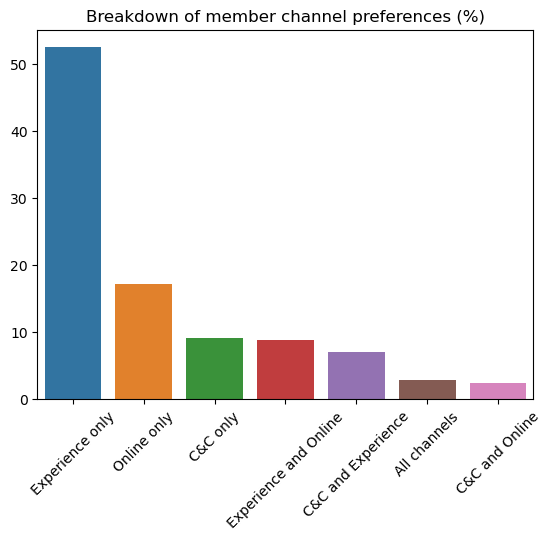

In [37]:
# Bar plot of the above findings.
sns.barplot(data=percentagedf, x="channelpref", y="percentage")

plt.xlabel('')
plt.ylabel('')
plt.title('Breakdown of member channel preferences (%)')
plt.xticks(rotation=45)

Users largely preferred Experience stores, with 52% of users shopping experience only, and 68.34% of members having shopped Experience stores at least once previously.

Numbers may be skewed due to “revenge shopping” as retail outlets had recently been reopened (July - December 2020).

Large majority of members (78.92%) only shop through a single channel. Could be interesting to see what the breakdown is for members with more than 1 transaction made.

### Channel preferences for members with more than 1 transaction

In [38]:
# Setting up to see the breakdown amongst members who had more than 1 transaction.
memsgroup['tottransac'] = memsgroup[['Experience', 'Click & Collect', 'Online']].sum(axis=1)
memsgroup2 = memsgroup[memsgroup['tottransac'] > 1]

In [39]:
# Count the occurrences of each unique value in 'channels'.
value_counts2 = memsgroup2['channelpref'].value_counts()
value_counts2.reset_index()

# Calculate the total number of records.
total_records2 = len(memsgroup2)

# Calculate the percentage for each combination.
proportion2 = value_counts2 / total_records2
percentage2 = proportion2 * 100
percentagedf2 = percentage2.reset_index()
percentagedf2.columns = ['channelpref', 'percentage']
percentagedf2['percentage'] = percentagedf2['percentage'].round(2)
percentagedf2

,index,channelpref
0,Experience only,179546
1,Online only,44143
2,Experience and Online,33911
3,C&C and Experience,26999
4,C&C only,22800
5,All channels,10862
6,C&C and Online,9369


,channelpref,percentage
0,Experience only,54.80
1,Online only,13.47
2,Experience and Online,10.35
3,C&C and Experience,8.24
4,C&C only,6.96
5,All channels,3.32
6,C&C and Online,2.86


<AxesSubplot:xlabel='channelpref', ylabel='percentage'>

Text(0.5, 0, '')

Text(0, 0.5, '')

Text(0.5, 1.0, 'Breakdown of member channel preferences (%)')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Experience only'),
  Text(1, 0, 'Online only'),
  Text(2, 0, 'Experience and Online'),
  Text(3, 0, 'C&C and Experience'),
  Text(4, 0, 'C&C only'),
  Text(5, 0, 'All channels'),
  Text(6, 0, 'C&C and Online')])

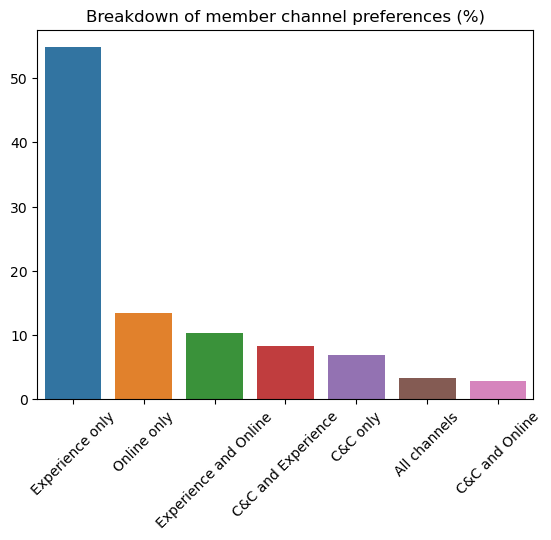

In [40]:
# Bar plot of the above findings.
sns.barplot(data=percentagedf2, x="channelpref", y="percentage")

plt.xlabel('')
plt.ylabel('')
plt.title('Breakdown of member channel preferences (%)')
plt.xticks(rotation=45)

In [41]:
# Setting up to see the breakdown amongst members who had more than 1 transaction.
memsgroup['tottransac'] = memsgroup[['Experience', 'Click & Collect', 'Online']].sum(axis=1)
memsgroup3 = memsgroup[memsgroup['tottransac'] == 1]

In [42]:
# Count the occurrences of each unique value in 'channels'.
value_counts3 = memsgroup3['channelpref'].value_counts()
value_counts3.reset_index()

# Calculate the total number of records.
total_records3 = len(memsgroup3)

# Calculate the percentage for each combination.
proportion3 = value_counts3 / total_records3
percentage3 = proportion3 * 100
percentagedf3 = percentage3.reset_index()
percentagedf3.columns = ['channelpref', 'percentage']
percentagedf3['percentage'] = percentagedf3['percentage'].round(2)
percentagedf3

,index,channelpref
0,Experience only,22596
1,Online only,22254
2,C&C only,12413


,channelpref,percentage
0,Experience only,39.46
1,Online only,38.86
2,C&C only,21.68


## 3. Store sales analysis

### Experience store sales

In [43]:
experiencedf2 = experiencedf.filter(['store_name','transac_value'], axis=1).copy()
experiencesales = experiencedf2.groupby(['store_name']).sum().sort_values('transac_value', ascending = False).reset_index()
experiencesales

,store_name,transac_value
0,Singapore Lab,72989385.27
1,Bedok SG,54467450.37
2,Joo Koon,49730116.43
3,City Square SG,48351650.23
4,Centre Point,35671077.71


<AxesSubplot:xlabel='store_name', ylabel='transac_value'>

Text(0.5, 0, '')

Text(0, 0.5, '')

Text(0.5, 1.0, 'Total sales of Experience stores')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Singapore Lab'),
  Text(1, 0, 'Bedok SG'),
  Text(2, 0, 'Joo Koon'),
  Text(3, 0, 'City Square SG'),
  Text(4, 0, 'Centre Point')])

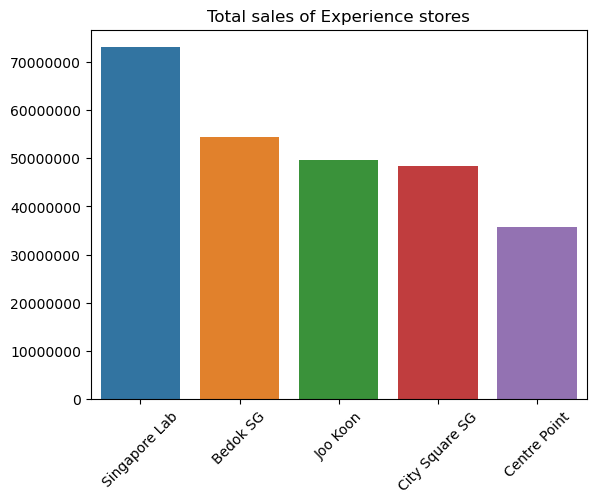

In [44]:
# Bar plot of the above findings.
sns.barplot(data=experiencesales, x="store_name", y="transac_value")

plt.xlabel('')
plt.ylabel('')
plt.title('Total sales of Experience stores')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')

### Click & Collect store analysis

In [45]:
ccdf2 = ccdf.filter(['store_name','transac_value'], axis=1).copy()
ccsales = ccdf2.groupby(['store_name']).sum().sort_values('transac_value', ascending = False).reset_index()
ccsales

,store_name,transac_value
0,Tampines Mall,6855070.70
1,Decathlon Velocity,5763752.20
2,Decathlon Holland Village,5361239.72
3,Waterway Point,4987302.50
4,SunPlaza,4170096.67
5,Tiong Bahru Plaza,2509331.90
6,Chinatown Point,2424581.80


<AxesSubplot:xlabel='store_name', ylabel='transac_value'>

Text(0.5, 0, '')

Text(0, 0.5, '')

Text(0.5, 1.0, 'Total sales of C&C stores')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Tampines Mall'),
  Text(1, 0, 'Decathlon Velocity'),
  Text(2, 0, 'Decathlon Holland Village'),
  Text(3, 0, 'Waterway Point'),
  Text(4, 0, 'SunPlaza'),
  Text(5, 0, 'Tiong Bahru Plaza'),
  Text(6, 0, 'Chinatown Point')])

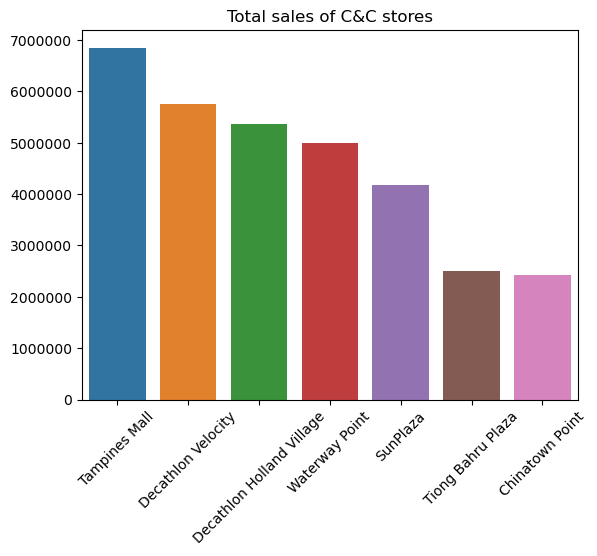

In [46]:
# Bar plot of the above findings.
sns.barplot(data=ccsales, x="store_name", y="transac_value")

plt.xlabel('')
plt.ylabel('')
plt.title('Total sales of C&C stores')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')

### All store sales analysis

#### Total sales by store

In [47]:
transactions2 = transactions.filter(['store_name','transac_value'], axis=1).copy()
salesdf = transactions2.groupby(['store_name']).sum().sort_values('transac_value', ascending = False).reset_index()
salesdf

,store_name,transac_value
0,Singapore Lab,72989385.27
1,Bedok SG,54467450.37
2,Joo Koon,49730116.43
3,City Square SG,48351650.23
4,Website,39157008.79
5,Centre Point,35671077.71
6,Tampines Mall,6855070.70
7,Decathlon Velocity,5763752.20
8,Decathlon Holland Village,5361239.72
9,Waterway Point,4987302.50


####  Total number of transactions by store

In [48]:
transactions3 = transactions.filter(['id_transac','store_name'], axis=1).copy()
transactions3 = transactions3.drop_duplicates(subset=['id_transac'])
transactionscountcount = transactions3.groupby(['store_name']).count().sort_values('id_transac', ascending = False).reset_index()
transactionscountcount

,store_name,id_transac
0,Singapore Lab,283405
1,City Square SG,237333
2,Bedok SG,213470
3,Joo Koon,198489
4,Website,193814
5,Centre Point,175098
6,Tampines Mall,55219
7,Decathlon Velocity,46769
8,Waterway Point,42351
9,Decathlon Holland Village,38903


<AxesSubplot:xlabel='store_name', ylabel='id_transac'>

Text(0.5, 1.0, 'Total transactions by store')

Text(0.5, 0, '')

Text(0, 0.5, '')

<AxesSubplot:xlabel='store_name', ylabel='transac_value'>

Text(0.5, 1.0, 'Total sales by store')

Text(0.5, 0, '')

Text(0, 0.5, '')

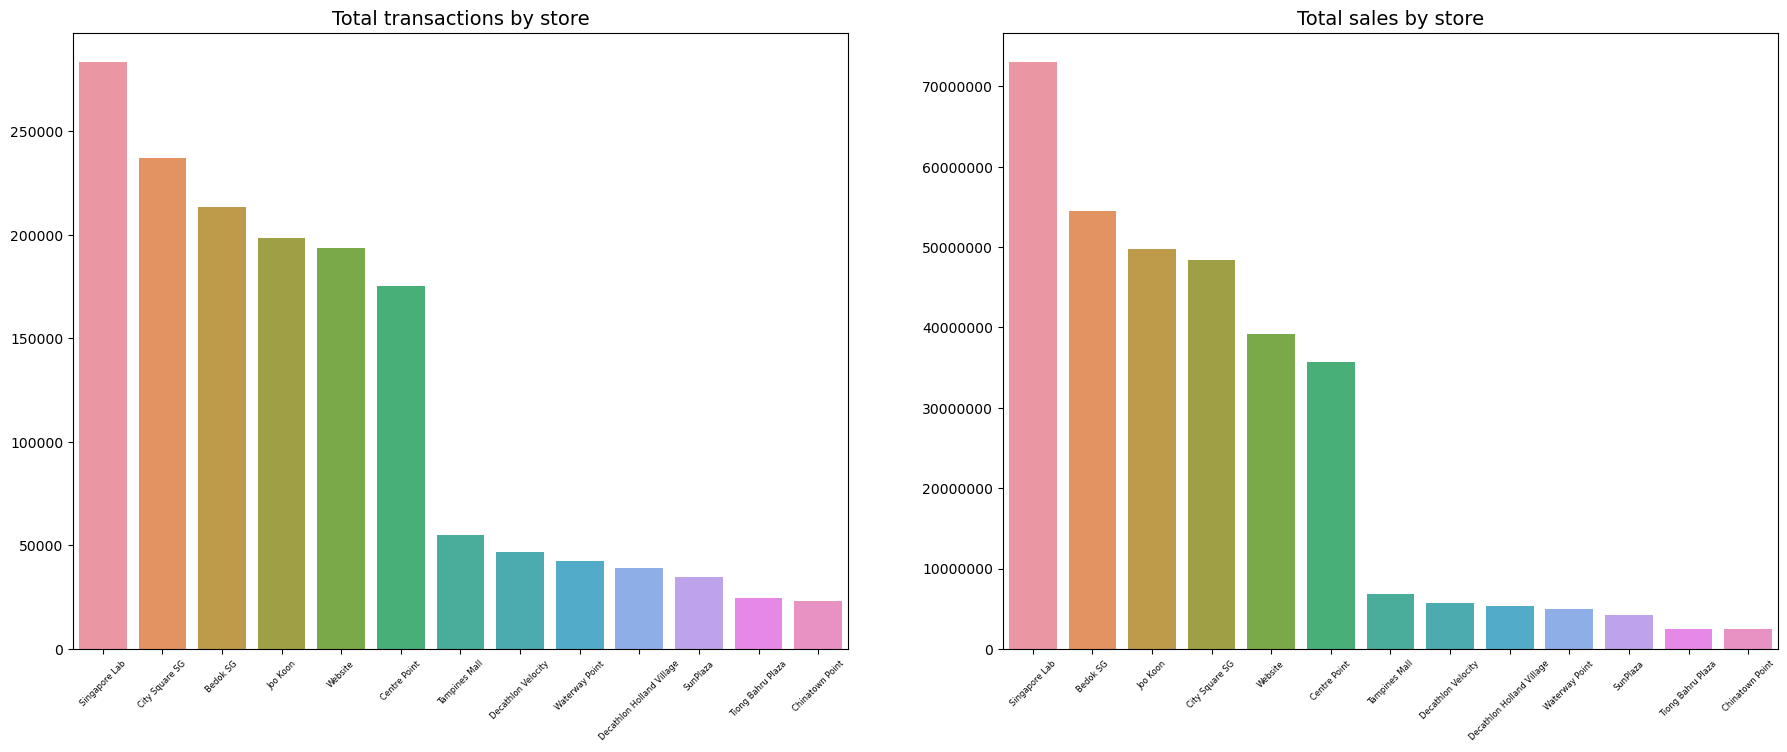

In [49]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Total transactions by store
sns.barplot(data=transactionscountcount, x='store_name', y='id_transac', ax=ax[0])
ax[0].set_title('Total transactions by store', fontsize='14')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].tick_params(axis='x', rotation=45, labelsize = 6)

# Total sales by store
sns.barplot(data=salesdf, x='store_name', y='transac_value', ax=ax[1])
ax[1].set_title('Total sales by store', fontsize='14')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].tick_params(axis='x', rotation=45, labelsize = 6)
ax[1].ticklabel_format(style='plain', axis='y')

plt.show()

## 4. Timings in the day that are most popular for customers

### Preparing data

In [50]:
# Filtering only rows from trasactions made in stores.
timeanalysisdf = transactions[transactions['store_name'] != 'Website']
timeanalysisdf.head()
timeanalysisdf.shape

,id_transac,date_transac,sku_id,product_type,sports,store_name,member_id,transac_type,item_qty,transac_value,ismember,channel
53,7-1034-1034-20200829140007-102-4073,2020-08-29 14:00:07,634928,NaN,NaN,City Square SG,NaN,offline,3,121.5,0,Experience
91,7-1034-1034-20201006104818-102-705,2020-10-06 10:48:18,2014743,NaN,NaN,City Square SG,8VSGYLTXL2,offline,1,29.5,1,Experience
656,7-2128-2128-20201128223450-101-8145,2020-11-28 22:34:50,1795606,UNDEFINED,RUGBY,Singapore Lab,NaN,offline,4,45.0,0,Experience
657,7-1034-1034-20200702133138-212-6643,2020-07-02 13:31:38,7200628,SHOES,RUNNING,City Square SG,NaN,offline,3,112.0,0,Experience
658,7-1034-1034-20200701183058-213-952,2020-07-01 18:30:58,7204159,WATER BAG,RUNNING,City Square SG,NaN,offline,3,218.0,0,Experience


(4814807, 12)

In [51]:
# Since each transaction = each visit, and nothing else is being analysed, filter only one row of each unique transaction ID.
timeanalysisdf = timeanalysisdf.drop_duplicates(subset=['id_transac'])
timeanalysisdf.shape

(1373725, 12)

In [52]:
# New column with day of the week
timeanalysisdf['dayOfWeek'] = timeanalysisdf['date_transac'].dt.dayofweek.map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
timeanalysisdf.head()

,id_transac,date_transac,sku_id,product_type,sports,store_name,member_id,transac_type,item_qty,transac_value,ismember,channel,dayOfWeek
53,7-1034-1034-20200829140007-102-4073,2020-08-29 14:00:07,634928,NaN,NaN,City Square SG,NaN,offline,3,121.5,0,Experience,Saturday
91,7-1034-1034-20201006104818-102-705,2020-10-06 10:48:18,2014743,NaN,NaN,City Square SG,8VSGYLTXL2,offline,1,29.5,1,Experience,Tuesday
656,7-2128-2128-20201128223450-101-8145,2020-11-28 22:34:50,1795606,UNDEFINED,RUGBY,Singapore Lab,NaN,offline,4,45.0,0,Experience,Saturday
657,7-1034-1034-20200702133138-212-6643,2020-07-02 13:31:38,7200628,SHOES,RUNNING,City Square SG,NaN,offline,3,112.0,0,Experience,Thursday
658,7-1034-1034-20200701183058-213-952,2020-07-01 18:30:58,7204159,WATER BAG,RUNNING,City Square SG,NaN,offline,3,218.0,0,Experience,Wednesday


In [53]:
# Labelling if the day of visit was a weekday or weekend.
timeanalysisdf['dayType'] = timeanalysisdf['dayOfWeek'].apply(lambda day: 'Weekend' if day in ['Saturday', 'Sunday'] else 'Weekday')
timeanalysisdf.head()

,id_transac,date_transac,sku_id,product_type,sports,store_name,member_id,transac_type,item_qty,transac_value,ismember,channel,dayOfWeek,dayType
53,7-1034-1034-20200829140007-102-4073,2020-08-29 14:00:07,634928,NaN,NaN,City Square SG,NaN,offline,3,121.5,0,Experience,Saturday,Weekend
91,7-1034-1034-20201006104818-102-705,2020-10-06 10:48:18,2014743,NaN,NaN,City Square SG,8VSGYLTXL2,offline,1,29.5,1,Experience,Tuesday,Weekday
656,7-2128-2128-20201128223450-101-8145,2020-11-28 22:34:50,1795606,UNDEFINED,RUGBY,Singapore Lab,NaN,offline,4,45.0,0,Experience,Saturday,Weekend
657,7-1034-1034-20200702133138-212-6643,2020-07-02 13:31:38,7200628,SHOES,RUNNING,City Square SG,NaN,offline,3,112.0,0,Experience,Thursday,Weekday
658,7-1034-1034-20200701183058-213-952,2020-07-01 18:30:58,7204159,WATER BAG,RUNNING,City Square SG,NaN,offline,3,218.0,0,Experience,Wednesday,Weekday


In [54]:
# New column with transaction time rounded to nearest hour.
timeanalysisdf['rounded_hour'] = timeanalysisdf['date_transac'].dt.round("H")

# Extract only the rounded time of the day.
timeanalysisdf['rounded_hour'] = timeanalysisdf['rounded_hour'].dt.strftime('%H:%M:%S')

timeanalysisdf.head()

,id_transac,date_transac,sku_id,product_type,sports,store_name,member_id,transac_type,item_qty,transac_value,ismember,channel,dayOfWeek,dayType,rounded_hour
53,7-1034-1034-20200829140007-102-4073,2020-08-29 14:00:07,634928,NaN,NaN,City Square SG,NaN,offline,3,121.5,0,Experience,Saturday,Weekend,14:00:00
91,7-1034-1034-20201006104818-102-705,2020-10-06 10:48:18,2014743,NaN,NaN,City Square SG,8VSGYLTXL2,offline,1,29.5,1,Experience,Tuesday,Weekday,11:00:00
656,7-2128-2128-20201128223450-101-8145,2020-11-28 22:34:50,1795606,UNDEFINED,RUGBY,Singapore Lab,NaN,offline,4,45.0,0,Experience,Saturday,Weekend,23:00:00
657,7-1034-1034-20200702133138-212-6643,2020-07-02 13:31:38,7200628,SHOES,RUNNING,City Square SG,NaN,offline,3,112.0,0,Experience,Thursday,Weekday,14:00:00
658,7-1034-1034-20200701183058-213-952,2020-07-01 18:30:58,7204159,WATER BAG,RUNNING,City Square SG,NaN,offline,3,218.0,0,Experience,Wednesday,Weekday,19:00:00


In [55]:
# Checking unique timings
timeanalysisdf['rounded_hour'].unique()

array(['14:00:00', '11:00:00', '23:00:00', '19:00:00', '15:00:00',
       '13:00:00', '12:00:00', '20:00:00', '18:00:00', '22:00:00',
       '16:00:00', '17:00:00', '21:00:00', '10:00:00', '00:00:00',
       '08:00:00', '09:00:00', '03:00:00', '05:00:00', '04:00:00',
       '02:00:00'], dtype=object)

In [56]:
# Assigning order to the timings for visualisations. Order was chosen based on Decathlon outlets opening hours (earliest being 9:30am).
timeanalysisdf['rounded_hour'] = pd.Categorical(timeanalysisdf['rounded_hour'], ['09:00:00','10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00','15:00:00','16:00:00','17:00:00','18:00:00','19:00:00','20:00:00','21:00:00','22:00:00','23:00:00'])
timeanalysisdf['dayOfWeek'] = pd.Categorical(timeanalysisdf['dayOfWeek'], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
timeanalysisdf.head()

,id_transac,date_transac,sku_id,product_type,sports,store_name,member_id,transac_type,item_qty,transac_value,ismember,channel,dayOfWeek,dayType,rounded_hour
53,7-1034-1034-20200829140007-102-4073,2020-08-29 14:00:07,634928,NaN,NaN,City Square SG,NaN,offline,3,121.5,0,Experience,Saturday,Weekend,14:00:00
91,7-1034-1034-20201006104818-102-705,2020-10-06 10:48:18,2014743,NaN,NaN,City Square SG,8VSGYLTXL2,offline,1,29.5,1,Experience,Tuesday,Weekday,11:00:00
656,7-2128-2128-20201128223450-101-8145,2020-11-28 22:34:50,1795606,UNDEFINED,RUGBY,Singapore Lab,NaN,offline,4,45.0,0,Experience,Saturday,Weekend,23:00:00
657,7-1034-1034-20200702133138-212-6643,2020-07-02 13:31:38,7200628,SHOES,RUNNING,City Square SG,NaN,offline,3,112.0,0,Experience,Thursday,Weekday,14:00:00
658,7-1034-1034-20200701183058-213-952,2020-07-01 18:30:58,7204159,WATER BAG,RUNNING,City Square SG,NaN,offline,3,218.0,0,Experience,Wednesday,Weekday,19:00:00


In [57]:
# Separating weekday and weekend data.
timeanalysisdf_weekday = timeanalysisdf[timeanalysisdf['dayType'] == 'Weekday']
timeanalysisdf_weekend = timeanalysisdf[timeanalysisdf['dayType'] == 'Weekend']

### Plotting time distributions and analysing most popular timings for stores

<Figure size 1100x800 with 0 Axes>

<AxesSubplot:xlabel='rounded_hour', ylabel='Count'>

Text(0.5, 0, 'Hour of day')

Text(0, 0.5, 'Transactions')

Text(0.5, 1.0, 'Distribution of all store transactions by hour of day')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

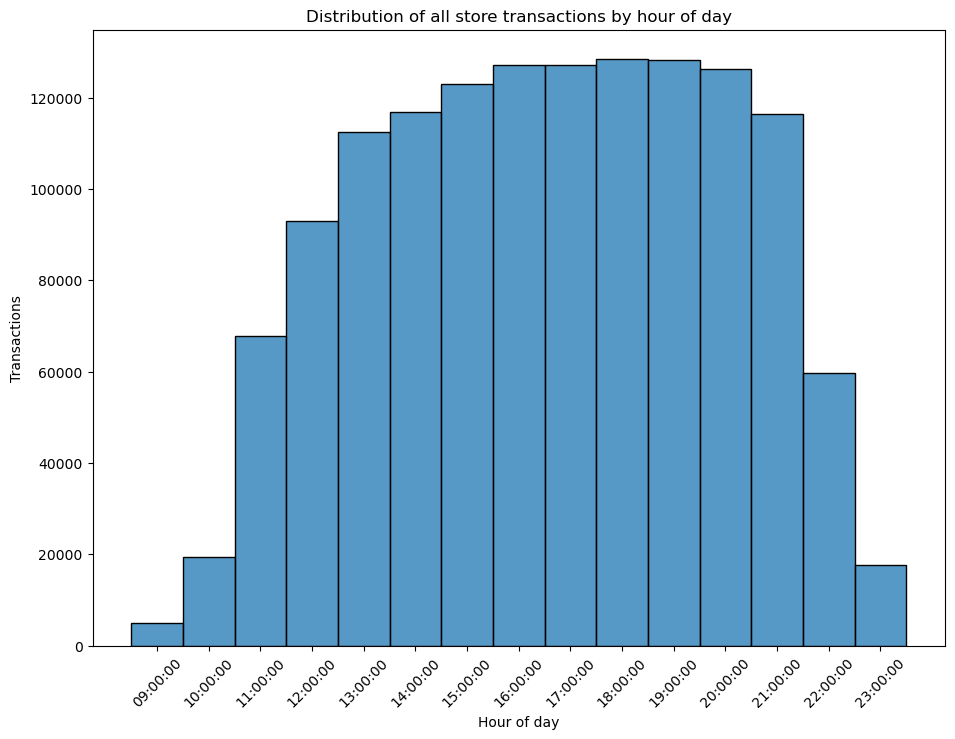

In [58]:
# Plotting histogram of the full dataset.
plt.figure(figsize=(11, 8))
sns.histplot(data=timeanalysisdf, x='rounded_hour')

plt.xlabel('Hour of day')
plt.ylabel('Transactions')
plt.title('Distribution of all store transactions by hour of day')
plt.xticks(rotation=45)

plt.show()

Preliminarily, based on the histogram of all data, 4pm - 8pm is a popular time for customers to shop.
However, the data can be broken down further for more specific insight.
For example, weekday vs weekend, and distributions for each outlet, where location could have a factor, e.g. C&C stores in heartlands can be passed by / dropped by quickly, whereas experience stores on outskirts require a planned trip.

<AxesSubplot:xlabel='rounded_hour', ylabel='Count'>

Text(0.5, 1.0, 'Weekday distribution')

Text(0.5, 0, 'Hour of day')

Text(0, 0.5, 'Transactions')

<AxesSubplot:xlabel='rounded_hour', ylabel='Count'>

Text(0.5, 1.0, 'Weekend distribution')

Text(0.5, 0, 'Hour of day')

Text(0, 0.5, 'Transactions')

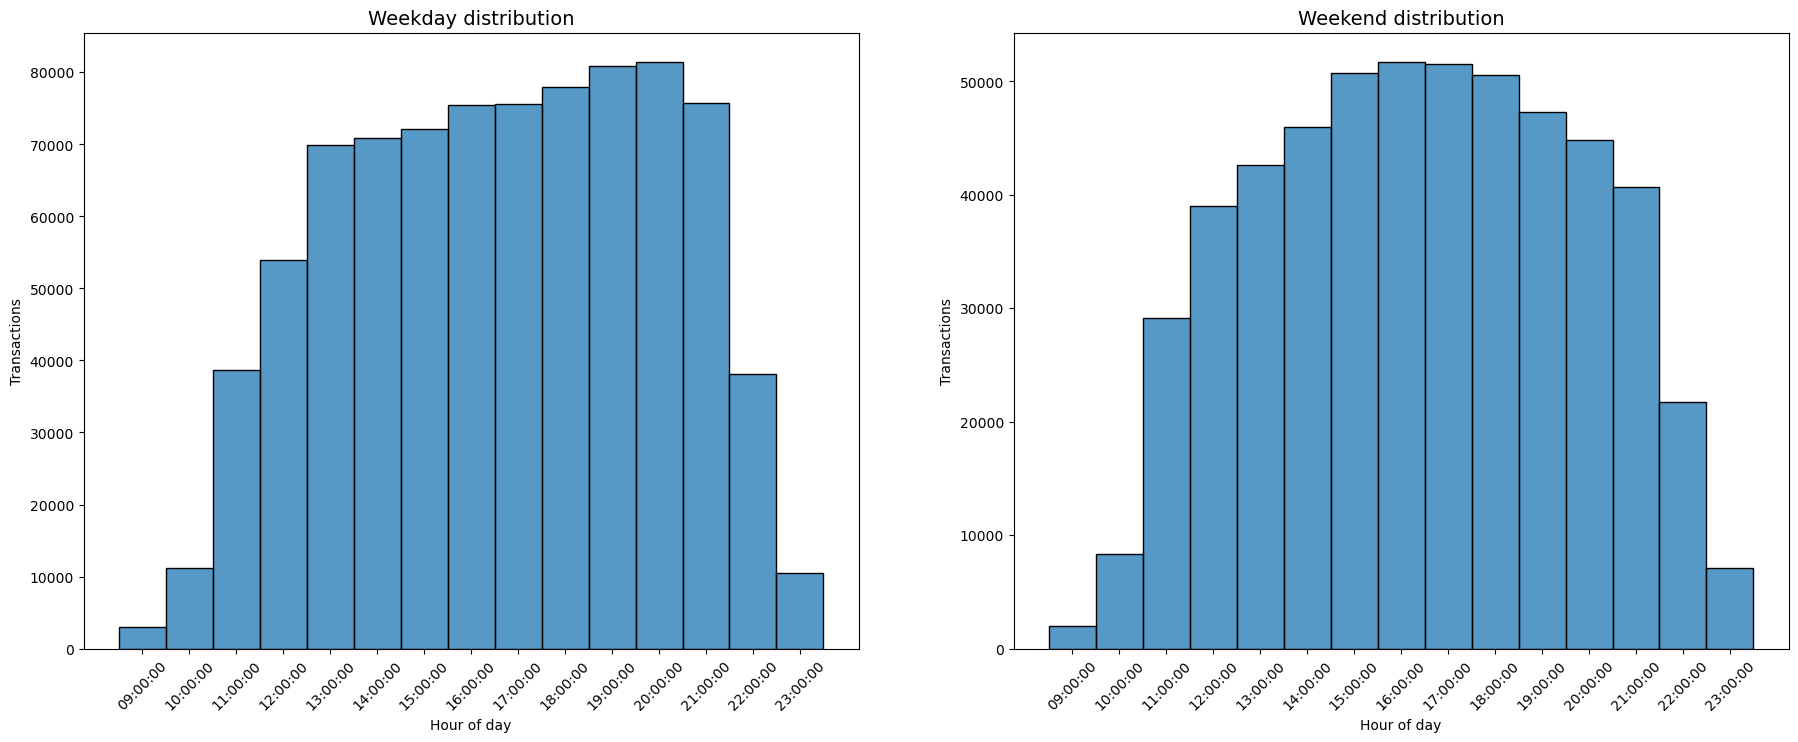

In [59]:
# Weekday and weekend distributions
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Weekday
sns.histplot(data=timeanalysisdf_weekday, x='rounded_hour', ax=ax[0])
ax[0].set_title('Weekday distribution', fontsize='14')
ax[0].set_xlabel('Hour of day')
ax[0].set_ylabel('Transactions')
ax[0].tick_params(axis='x', rotation=45)

# Weekend
sns.histplot(data=timeanalysisdf_weekend, x='rounded_hour',ax=ax[1])
ax[1].set_title('Weekend distribution', fontsize='14')
ax[1].set_xlabel('Hour of day')
ax[1].set_ylabel('Transactions')
ax[1].tick_params(axis='x', rotation=45)

plt.show()

<Figure size 1100x800 with 0 Axes>

C:\Users\diony\AppData\Local\Temp\ipykernel_32408\1508349800.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)


<Figure size 1100x800 with 0 Axes>

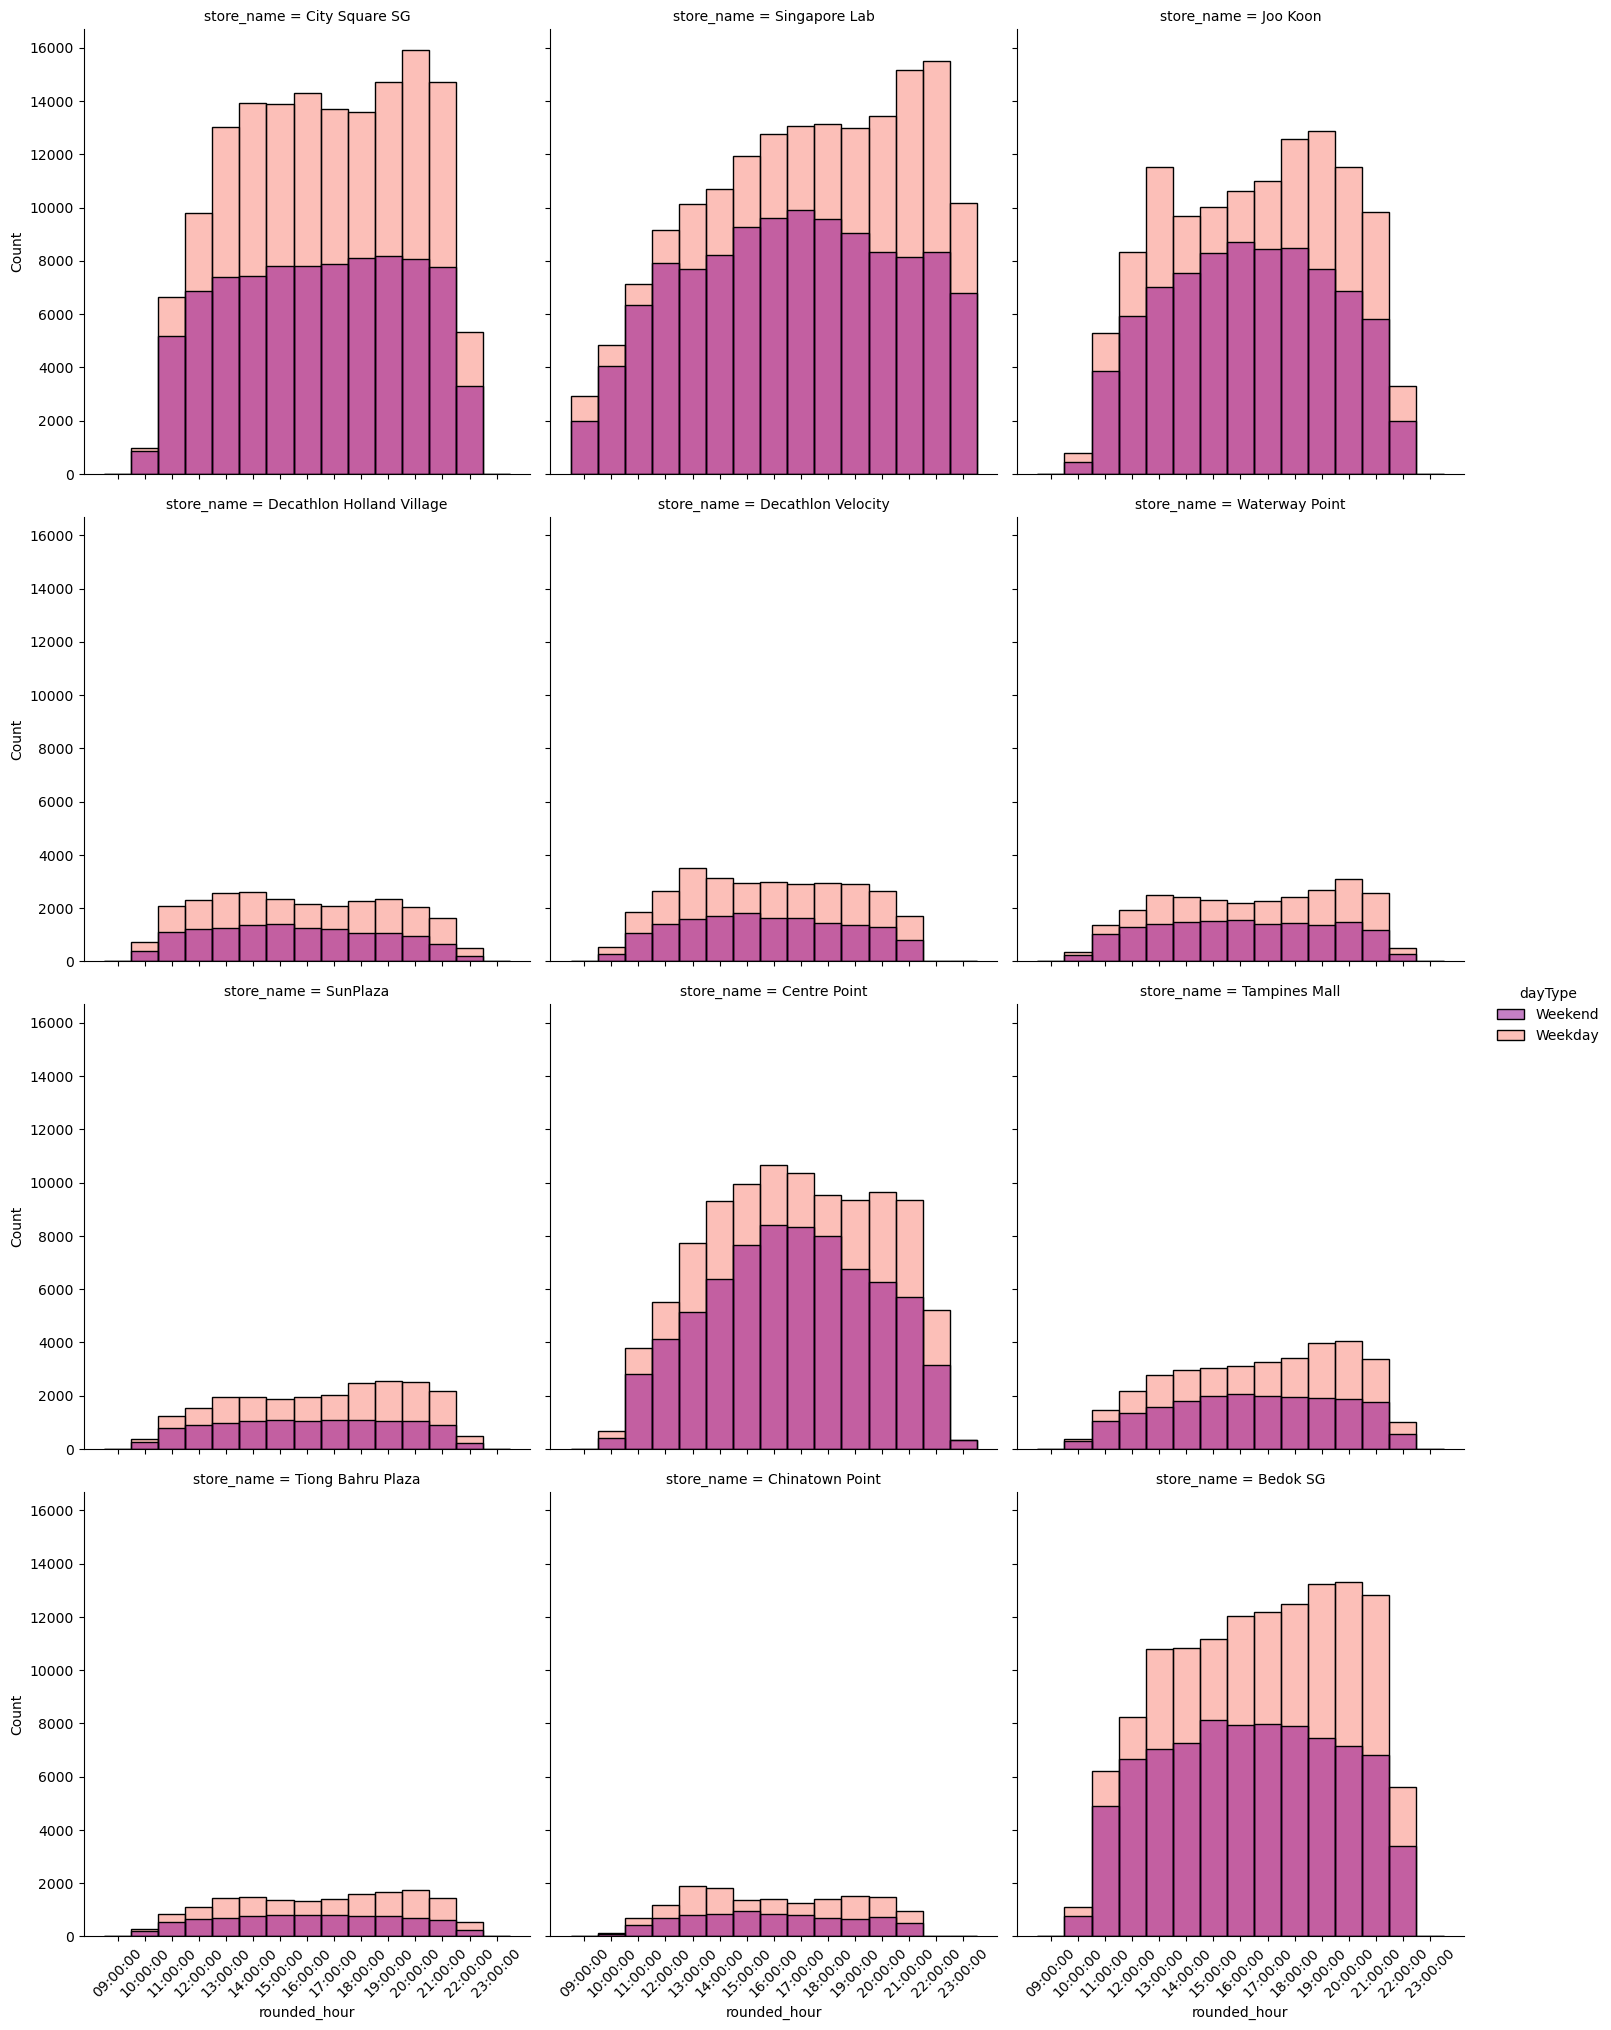

In [60]:
# Plotting weekday and weekend distribution for each outlet.
custpalette = {"Weekday":"salmon",
           "Weekend":"darkmagenta"}


plt.figure(figsize=(11, 8))
timedisps = sns.displot(data=timeanalysisdf, x="rounded_hour", hue="dayType", palette = custpalette, multiple='layer', col="store_name",col_wrap=3) 
for axes in timedisps.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)

plt.show()

On <b>weekdays</b>, 6-8pm is most popular, likely due to a boost in footfall after customers are done with work.<br>
On <b>weekends</b>, 3-6pm is most popular, which could be because this timing is in between meals, and when shoppers are most active.

Through further analysis of this data, insights can found for scheduling, inventory, etc.

### Transactions by store by day of week

<Figure size 1100x800 with 0 Axes>

C:\Users\diony\AppData\Local\Temp\ipykernel_32408\612687162.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)


<Figure size 1100x800 with 0 Axes>

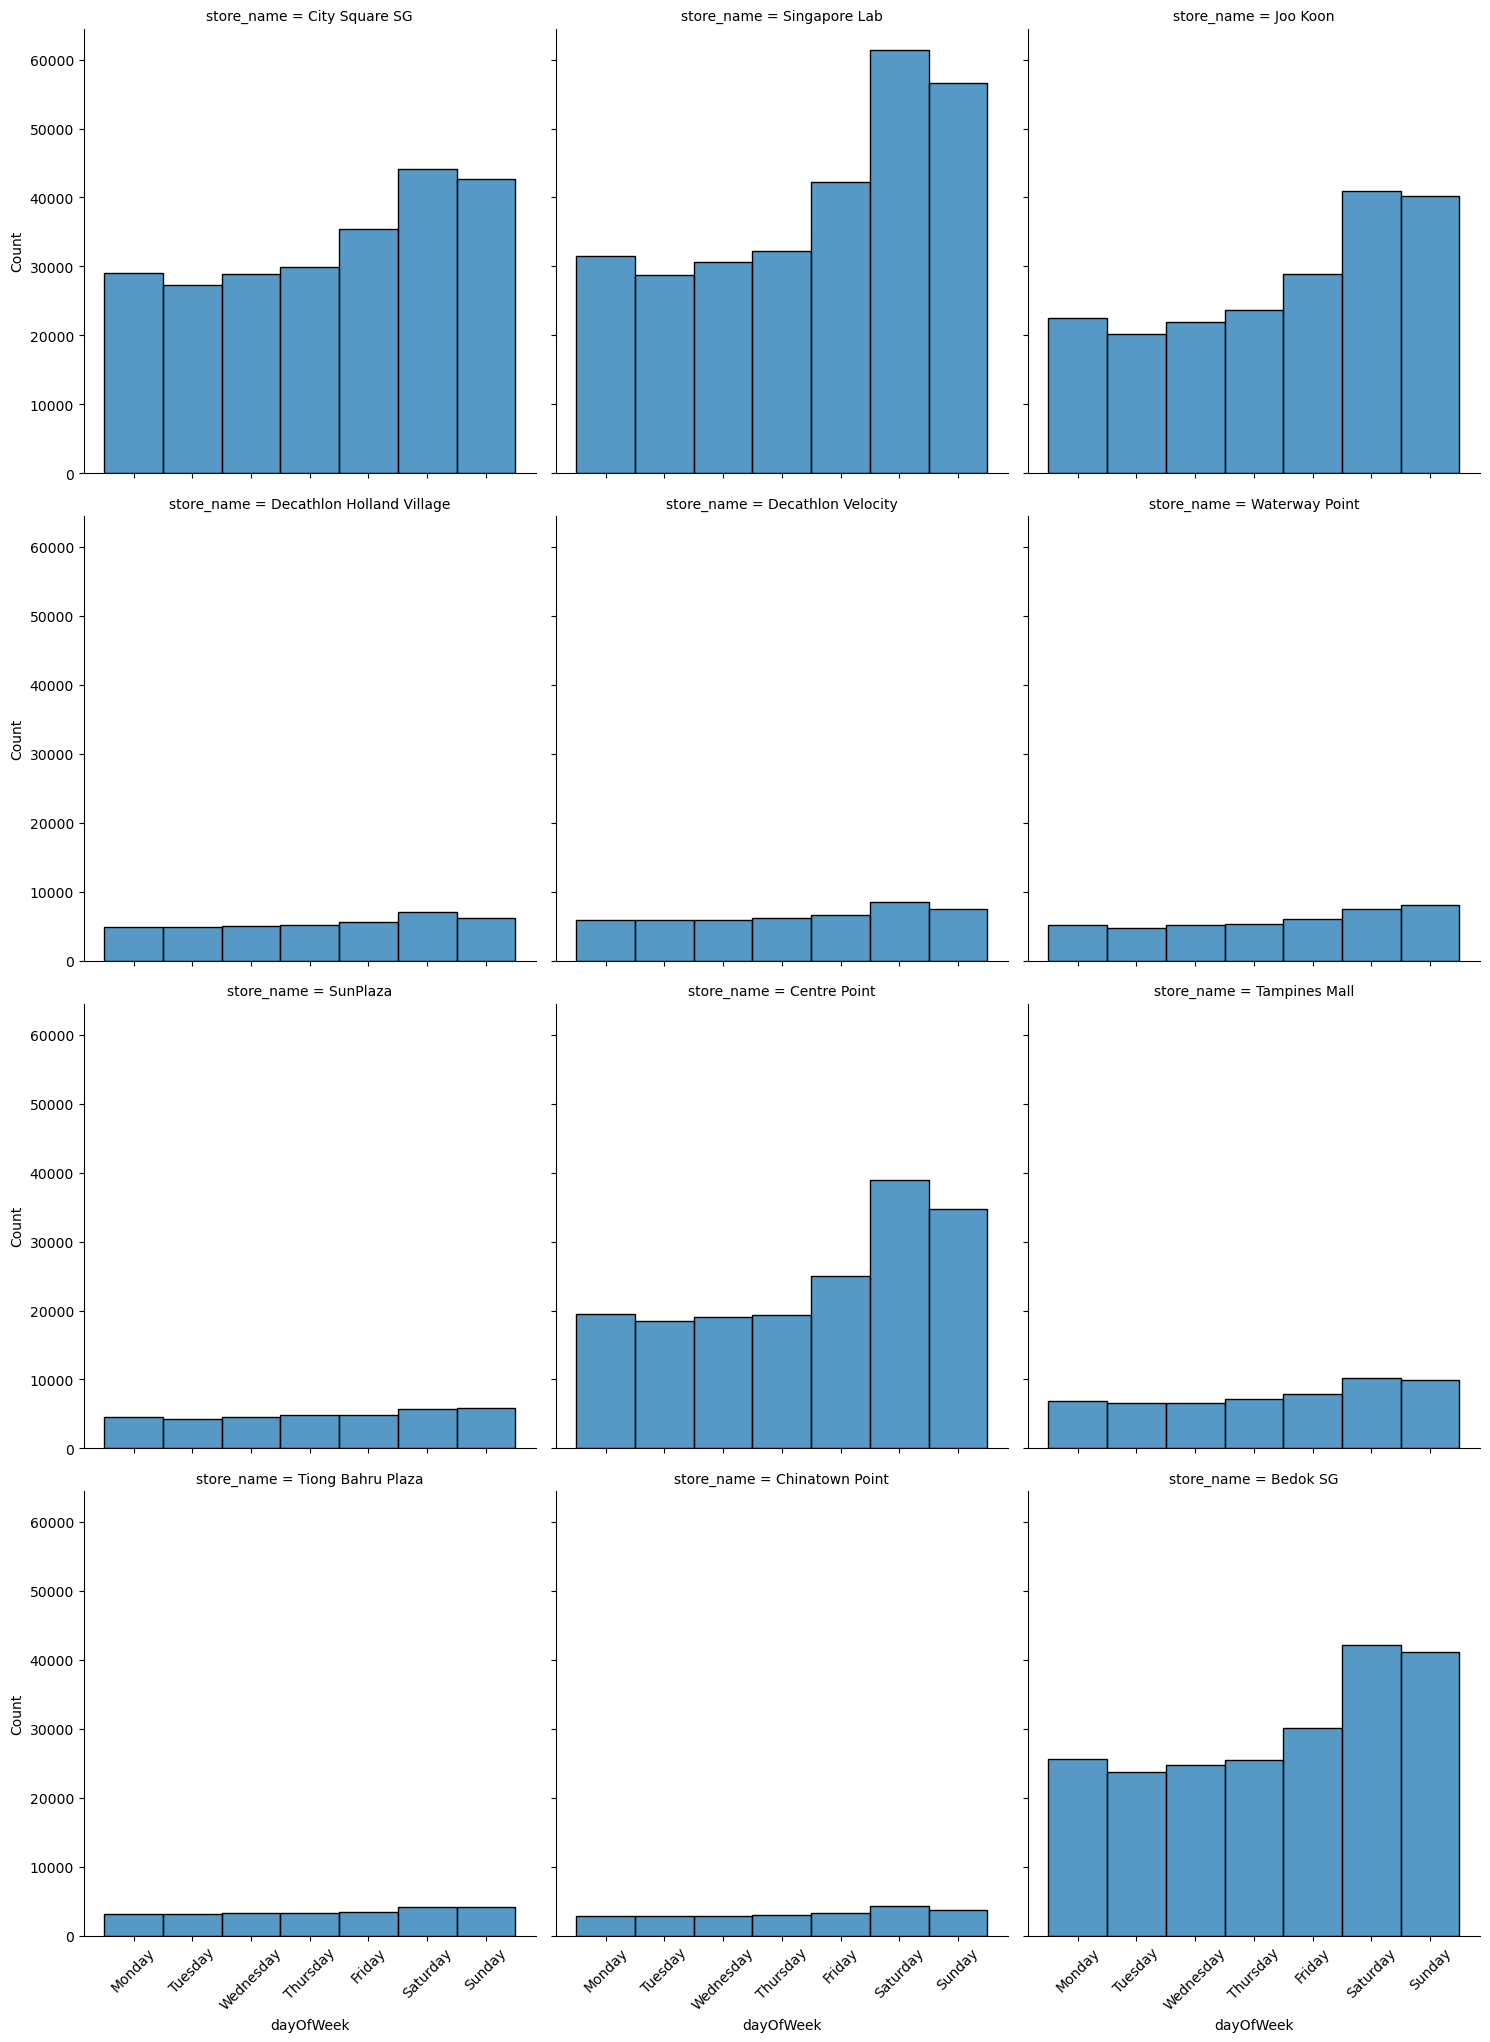

In [61]:
# Plotting weekday and weekend distribution for each outlet.
#custpalette = {"Weekday":"salmon",
 #          "Weekend":"darkmagenta"}

plt.figure(figsize=(11, 8))
timedisps2 = sns.displot(data=timeanalysisdf, x="dayOfWeek", col="store_name",col_wrap=3) 
for axes in timedisps2.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)

plt.show()


## 5. Market Basket Analysis
Using Apriori algorithm to find items that are frequently bought together, for cart cross-selling, or retail product placement improvements.

In [62]:
# Importing Apriori algorithm from mlxtend library.
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

### Distribution of transactions with different products types

In [63]:
transachist = transactions.groupby(['id_transac'])['transac_value'].count().reset_index()
transachist

,id_transac,transac_value
0,7-1034-1034-20200701100516-207-8331,1
1,7-1034-1034-20200701102229-206-657,4
2,7-1034-1034-20200701102316-215-8331,3
3,7-1034-1034-20200701102336-213-877,3
4,7-1034-1034-20200701102419-209-1071,2
...,...,...
1567534,7-969-969-20201231220117-211-9139,13
1567535,7-969-969-20201231220229-208-5285,17
1567536,7-969-969-20201231220439-101-3609,1
1567537,7-969-969-20201231220505-208-5286,1


In [64]:
transachist.nlargest(200, 'transac_value')
transachist = transachist.loc[transachist.transac_value <= 40]

,id_transac,transac_value
853309,7-2128-2128-20201119152234-101-5972,96
1497798,7-969-969-20201113153441-203-2429,80
919443,7-2128-2128-20201220145937-210-5923,78
684895,7-2128-2128-20200825182716-101-7892,74
941085,7-2128-2128-20201229104424-210-8057,63
...,...,...
890331,7-2128-2128-20201206213029-204-7970,40
901968,7-2128-2128-20201212190554-210-4365,40
916147,7-2128-2128-20201219134852-206-8497,40
1145605,7-2459-2459-20201122134400-208-75,40


<AxesSubplot:xlabel='transac_value', ylabel='Count'>

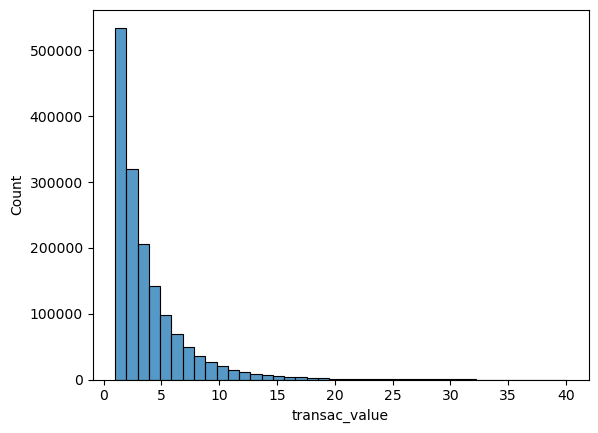

In [65]:
fig, ax = plt.subplots()
sns.histplot(data = transachist, x = 'transac_value', bins = 40, ax=ax)

Transactions with only a single product type were the most common, and for every additional product, there were fewer total transactions. Therefore, customers favoured having fewer product types in their transactions.

### Bundling / cross-selling for Experience stores

In [66]:
# Using sku_id would be too specific, for example, the same t-shirt in different colours would be different skus.
# Therefore, product type combined with the sport type will be used. 
experiencedf['new_product'] = experiencedf["product_type"] + " " + experiencedf['sports']
experiencedf.head()

,id_transac,date_transac,sku_id,product_type,sports,store_name,member_id,transac_type,item_qty,transac_value,ismember,channel,new_product
53,7-1034-1034-20200829140007-102-4073,2020-08-29 14:00:07,634928,NaN,NaN,City Square SG,NaN,offline,3,121.5,0,Experience,NaN
91,7-1034-1034-20201006104818-102-705,2020-10-06 10:48:18,2014743,NaN,NaN,City Square SG,8VSGYLTXL2,offline,1,29.5,1,Experience,NaN
656,7-2128-2128-20201128223450-101-8145,2020-11-28 22:34:50,1795606,UNDEFINED,RUGBY,Singapore Lab,NaN,offline,4,45.0,0,Experience,UNDEFINED RUGBY
657,7-1034-1034-20200702133138-212-6643,2020-07-02 13:31:38,7200628,SHOES,RUNNING,City Square SG,NaN,offline,3,112.0,0,Experience,SHOES RUNNING
658,7-1034-1034-20200701183058-213-952,2020-07-01 18:30:58,7204159,WATER BAG,RUNNING,City Square SG,NaN,offline,3,218.0,0,Experience,WATER BAG RUNNING


In [67]:
# grouping experience store transactions by product desc, with summed item qty as a counter.
experiencebask = experiencedf.groupby(['id_transac', 'new_product'])['item_qty'].sum().reset_index()
experiencebask

,id_transac,new_product,item_qty
0,7-1034-1034-20200701100516-207-8331,SPORTS BAG FOOTBALL,2
1,7-1034-1034-20200701102229-206-657,SHORTS FITNESS,5
2,7-1034-1034-20200701102229-206-657,T-SHIRT FITNESS,1
3,7-1034-1034-20200701102229-206-657,TOWEL SWIMMING,5
4,7-1034-1034-20200701102316-215-8331,LEGGINGS SURFING,7
...,...,...,...
3378932,7-969-969-20201231220229-208-5285,WEIGHT LOCK BODYBUILDING,9
3378933,7-969-969-20201231220229-208-5285,WEIGHT PLATE BODYBUILDING,7
3378934,7-969-969-20201231220229-208-5285,YOGA BLOCK YOGA,3
3378935,7-969-969-20201231220439-101-3609,UNDEFINED WORKSHOP AND SERVICES,5


In [68]:
groupedexp = experiencebask.groupby(['id_transac']).count().reset_index()
groupedexp.sample(10)

,id_transac,new_product,item_qty
191594,7-1034-1034-20201130182435-207-7227,3,3
618770,7-2128-2128-20201031153058-203-8177,3,3
353792,7-1871-1871-20201025132359-102-4320,1,1
881618,7-2459-2459-20201225153111-206-1968,2,2
355682,7-1871-1871-20201026202055-208-605,1,1
249606,7-1871-1871-20200711210620-207-3062,3,3
188839,7-1034-1034-20201128203812-213-5347,9,9
435130,7-1871-1871-20201231163553-206-276,4,4
673451,7-2128-2128-20201205220548-207-8516,4,4
362583,7-1871-1871-20201101204056-209-5950,1,1


In [69]:
morethanthree = groupedexp[groupedexp['new_product'] >= 3]
extranacsample = morethanthree.sample(n=30000, random_state = 99)
extranacsample

,id_transac,new_product,item_qty
512045,7-2128-2128-20200816210725-207-3027,3,3
673281,7-2128-2128-20201205210152-101-9834,3,3
545884,7-2128-2128-20200910103308-203-9121,6,6
878714,7-2459-2459-20201223193214-102-2667,3,3
275650,7-1871-1871-20200806185913-208-5407,3,3
...,...,...,...
794876,7-2459-2459-20201031203746-207-8918,6,6
608259,7-2128-2128-20201024160702-206-1127,7,7
492670,7-2128-2128-20200805141640-205-4864,3,3
289939,7-1871-1871-20200820193942-206-1094,3,3


In [70]:
experiencebask2 = experiencebask[experiencebask['id_transac'].isin(extranacsample['id_transac'])]
experiencebask2

,id_transac,new_product,item_qty
104,7-1034-1034-20200701110443-213-881,BALL VOLLEYBALL,2
105,7-1034-1034-20200701110443-213-881,FLYING DISC SURFING,1
106,7-1034-1034-20200701110443-213-881,FOOT BALL FOOTBALL,1
107,7-1034-1034-20200701110443-213-881,HAND PUMP FOOTBALL,4
108,7-1034-1034-20200701110443-213-881,SWIMMING GOGGLE SWIMMING,3
...,...,...,...
3378791,7-969-969-20201231213430-203-8368,SOCKS CYCLING,10
3378792,7-969-969-20201231213430-203-8368,TANK FITNESS,5
3378816,7-969-969-20201231213956-209-5431,BALL NEEDLE FOOTBALL,3
3378817,7-969-969-20201231213956-209-5431,HAND PUMP FOOTBALL,3


In [71]:
experiencebask3 = experiencebask2.pivot_table(values='item_qty', index='id_transac', columns="new_product").fillna(0)
experiencebask3

new_product,1-PIECE SWIMSUI SURFING,1-PIECE SWIMSUI SWIMMING,1-PIECE SWIMSUI WATERSPORT,2 PIECES SWIMSU SURFING,3/4 CYCLING BIB CYCLING,ABDOMINAL WHEEL BODYBUILDING,ABS EQUIPMENT PILATES,ADAPTOR CYCLING,ADHESIVE TAPE TEAMSPORT,AFTER SUN LOTIO NUTRITION,...,WORKSHOP STAND CYCLING,WRAP-AROUND TOP DANCE,WRIST GUARD URBAN,WRIST LOOP WATERSPORT,WRIST SUPPORT BODYBUILDING,WRIST SUPPORT NETBALL,WRIST SUPPORT TENNIS,WRIST TENNIS,YOGA BLOCK YOGA,YOGA MAT YOGA
id_transac,,,,,,,,,,,,,,,,,,,,,
7-1034-1034-20200701110443-213-881,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7-1034-1034-20200701112239-212-6502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7-1034-1034-20200701115113-206-668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7-1034-1034-20200701125624-211-540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7-1034-1034-20200701133310-208-4270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7-969-969-20201231201813-206-4525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7-969-969-20201231202343-204-7282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7-969-969-20201231211926-210-556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

experiencebask2_sets = experiencebask3.applymap(encode_units).astype(bool)

In [73]:
experiencebask2_sets

new_product,1-PIECE SWIMSUI SURFING,1-PIECE SWIMSUI SWIMMING,1-PIECE SWIMSUI WATERSPORT,2 PIECES SWIMSU SURFING,3/4 CYCLING BIB CYCLING,ABDOMINAL WHEEL BODYBUILDING,ABS EQUIPMENT PILATES,ADAPTOR CYCLING,ADHESIVE TAPE TEAMSPORT,AFTER SUN LOTIO NUTRITION,...,WORKSHOP STAND CYCLING,WRAP-AROUND TOP DANCE,WRIST GUARD URBAN,WRIST LOOP WATERSPORT,WRIST SUPPORT BODYBUILDING,WRIST SUPPORT NETBALL,WRIST SUPPORT TENNIS,WRIST TENNIS,YOGA BLOCK YOGA,YOGA MAT YOGA
id_transac,,,,,,,,,,,,,,,,,,,,,
7-1034-1034-20200701110443-213-881,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7-1034-1034-20200701112239-212-6502,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7-1034-1034-20200701115113-206-668,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7-1034-1034-20200701125624-211-540,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7-1034-1034-20200701133310-208-4270,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7-969-969-20201231201813-206-4525,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7-969-969-20201231202343-204-7282,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7-969-969-20201231211926-210-556,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [74]:
frequent_itemsets = apriori(experiencebask2_sets, min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.028300,(1-PIECE SWIMSUI SWIMMING)
1,0.017333,(AQUASHOES WATERSPORT)
2,0.015100,(ARM GUARD CYCLING)
3,0.083733,(BACKPACK MOUNTAIN)
4,0.034233,(BADMINTON RACKE BADMINTON)
...,...,...
168,0.010367,"(T-SHIRT RUNNING, T-SHIRT GYMNASTICS)"
169,0.010167,"(T-SHIRT PILATES, T-SHIRT MOUNTAIN)"
170,0.020500,"(T-SHIRT RUNNING, T-SHIRT MOUNTAIN)"
171,0.011267,"(T-SHIRT RUNNING, T-SHIRT PILATES)"


In [75]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values(by=['confidence'], ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
39,(LEGGINGS SURFING),(TOP SURFING),0.021467,0.066033,0.014000,0.652174,9.876435,0.012582,2.685154,0.918465
34,(INLINE SKATES URBAN),(PROTECTION KIT URBAN),0.019900,0.028200,0.012500,0.628141,22.274493,0.011939,2.613354,0.974498
33,(HELMET URBAN),(PROTECTION KIT URBAN),0.022267,0.028200,0.012800,0.574850,20.384762,0.012172,2.285783,0.972600
36,(LEGGINGS GYMNASTICS),(T-SHIRT GYMNASTICS),0.022933,0.057900,0.011967,0.521802,9.012130,0.010639,1.970106,0.909906
27,(BOTTLE CAGE CYCLING),(WATER BOTTLE CYCLING),0.025600,0.033833,0.011667,0.455729,13.469828,0.010801,1.775158,0.950082
32,(PROTECTION KIT URBAN),(HELMET URBAN),0.028200,0.022267,0.012800,0.453901,20.384762,0.012172,1.790395,0.978539
62,(SHORTS GYMNASTICS),(T-SHIRT GYMNASTICS),0.043433,0.057900,0.019567,0.450499,7.780636,0.017052,1.714464,0.911046
35,(PROTECTION KIT URBAN),(INLINE SKATES URBAN),0.028200,0.019900,0.012500,0.443262,22.274493,0.011939,1.760434,0.982821
45,(SHORT-SLEEVE JE FOOTBALL),(SHORTS FOOTBALL),0.030833,0.035767,0.012333,0.400000,11.183597,0.011231,1.607056,0.939553
25,(BOARDSHORTS SURFING),(TOP SURFING),0.046667,0.066033,0.018333,0.392857,5.949376,0.015252,1.538298,0.872638


In [76]:
# Filtering by lift and confidence. Lift is how strong the association is between antecedent and consequent, and 2 and above is 
# significant. Confidence is the ratio of number of transactions with both A and B and number of transactions of B.

rules[(rules['lift'] >= 2) &
       (rules['confidence'] >= 0.25)].sort_values(by=['confidence'], ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
39,(LEGGINGS SURFING),(TOP SURFING),0.021467,0.066033,0.014000,0.652174,9.876435,0.012582,2.685154,0.918465
34,(INLINE SKATES URBAN),(PROTECTION KIT URBAN),0.019900,0.028200,0.012500,0.628141,22.274493,0.011939,2.613354,0.974498
33,(HELMET URBAN),(PROTECTION KIT URBAN),0.022267,0.028200,0.012800,0.574850,20.384762,0.012172,2.285783,0.972600
36,(LEGGINGS GYMNASTICS),(T-SHIRT GYMNASTICS),0.022933,0.057900,0.011967,0.521802,9.012130,0.010639,1.970106,0.909906
27,(BOTTLE CAGE CYCLING),(WATER BOTTLE CYCLING),0.025600,0.033833,0.011667,0.455729,13.469828,0.010801,1.775158,0.950082
32,(PROTECTION KIT URBAN),(HELMET URBAN),0.028200,0.022267,0.012800,0.453901,20.384762,0.012172,1.790395,0.978539
62,(SHORTS GYMNASTICS),(T-SHIRT GYMNASTICS),0.043433,0.057900,0.019567,0.450499,7.780636,0.017052,1.714464,0.911046
35,(PROTECTION KIT URBAN),(INLINE SKATES URBAN),0.028200,0.019900,0.012500,0.443262,22.274493,0.011939,1.760434,0.982821
45,(SHORT-SLEEVE JE FOOTBALL),(SHORTS FOOTBALL),0.030833,0.035767,0.012333,0.400000,11.183597,0.011231,1.607056,0.939553
25,(BOARDSHORTS SURFING),(TOP SURFING),0.046667,0.066033,0.018333,0.392857,5.949376,0.015252,1.538298,0.872638


### Subsection conclusion:
These are item combinations that are frequently bought by customers. Though all of the ones in this list are quite obvious (e.g. surfing leggings with surfing top, cycling water bottle with cyling bottle cage), they are now confirmed by data. Additionally, the sample size, and confidence and lift thresholds can be tweaked to find more obscure combinations.

### Bundling for Online
Running the same algorithm on a sample of online transactions to see if the combinations will be quite different through a different shopping channel.

In [77]:
# Product desc column
onlinedf['new_product'] = onlinedf["product_type"] + " " + onlinedf['sports']
onlinedf.head()

,id_transac,date_transac,sku_id,product_type,sports,store_name,member_id,transac_type,item_qty,transac_value,ismember,channel,new_product
475,7-2459-2459-20200923214628-102-851,2020-09-23 21:46:28,1718267,NaN,NaN,Website,E1OWOWPT1K,online,5,110.5,1,Online,NaN
670,7-1034-1034-20200710102742-117-88,2020-07-10 10:27:42,7206544,WATER BOTTLE BE,RUNNING,Website,ZY8KCYC8O3,online,5,83.5,1,Online,WATER BOTTLE BE RUNNING
786,7-1034-1034-20200704160615-117-27,2020-07-04 16:06:15,7204924,RUNNING MID TIG,RUNNING,Website,0VX6TTV6ES,online,2,98.5,1,Online,RUNNING MID TIG RUNNING
788,7-1034-1034-20200703124109-102-6434,2020-07-03 12:41:09,7231216,WATER BOTTLE BE,RUNNING,Website,OUSGNK1LLA,online,5,48.5,1,Online,WATER BOTTLE BE RUNNING
826,7-1034-1034-20200803174610-118-52,2020-08-03 17:46:10,7209766,SHORTS,RUNNING,Website,POSTV6OQ9L,online,2,36.5,1,Online,SHORTS RUNNING


In [78]:
# grouping experience store transactions by product desc, with summed item qty as a counter.
onlinebask = onlinedf.groupby(['id_transac', 'new_product'])['item_qty'].sum().reset_index()
onlinebask

,id_transac,new_product,item_qty
0,7-1034-1034-20200701112936-102-6101,SHORTS MOUNTAIN,1
1,7-1034-1034-20200701112936-102-6101,TROUSERS MOUNTAIN,4
2,7-1034-1034-20200701114220-102-6102,BACKPACK MOUNTAIN,28
3,7-1034-1034-20200701114619-102-6103,BACKPACK MOUNTAIN,21
4,7-1034-1034-20200701115438-102-6106,TOWEL SWIMMING,7
...,...,...,...
437053,7-969-969-20201231213532-215-9561,SADDLE BAG CYCLING,2
437054,7-969-969-20201231213922-216-174,CHILD BIKE CYCLING,2
437055,7-969-969-20201231214031-215-9562,FLIP-FLOPS SURFING,2
437056,7-969-969-20201231214031-215-9563,SADDLE BAG CYCLING,3


In [79]:
groupedonl = onlinebask.groupby(['id_transac']).count().reset_index()
groupedonl.sample(10)

,id_transac,new_product,item_qty
187283,7-969-969-20201122164533-215-7041,2,2
120203,7-2128-2128-20201120192754-217-2920,1,1
64609,7-2128-2128-20200805141407-217-2770,1,1
26198,7-1871-1871-20201020115747-114-7058,1,1
52982,7-2128-2128-20200715124701-217-3577,2,2
177668,7-969-969-20201002163324-101-9949,1,1
67904,7-2128-2128-20200811103329-217-5386,1,1
30935,7-1871-1871-20201111181705-114-284,7,7
51136,7-2128-2128-20200711190640-217-2113,2,2
147726,7-2221-2221-20201219140532-204-744,3,3


In [80]:
morethanthreeonl = groupedonl[groupedonl['new_product'] >= 3]
onltranacsample = morethanthreeonl.sample(n=30000, random_state = 17)
onltranacsample

,id_transac,new_product,item_qty
168024,7-2476-2476-20201129202531-206-2494,3,3
16951,7-1871-1871-20200829160319-114-664,3,3
157975,7-2459-2459-20201127193032-215-5942,5,5
20459,7-1871-1871-20200919130933-114-3105,5,5
5320,7-1034-1034-20201021211530-117-3679,3,3
...,...,...,...
46302,7-2128-2128-20200703165807-215-3032,5,5
86657,7-2128-2128-20200916203347-217-9579,3,3
3622,7-1034-1034-20200921121635-118-1092,3,3
81824,7-2128-2128-20200907093224-217-6196,3,3


In [81]:
onlinebask2 = onlinebask[onlinebask['id_transac'].isin(onltranacsample['id_transac'])]
onlinebask2

,id_transac,new_product,item_qty
15,7-1034-1034-20200701154336-102-6161,ANTI-FOGGING SWIMMING,2
16,7-1034-1034-20200701154336-102-6161,SHORTS RUNNING,4
17,7-1034-1034-20200701154336-102-6161,T-SHIRT RUNNING,4
18,7-1034-1034-20200701154336-102-6161,TANK CYCLING,3
24,7-1034-1034-20200702095808-117-4,BOARDSHORTS SURFING,3
...,...,...,...
437012,7-969-969-20201231190032-215-9556,GLOVES BODYBUILDING,3
437013,7-969-969-20201231190032-215-9556,SHORTS FITNESS,1
437014,7-969-969-20201231190032-215-9557,CARRY CASE MOUNTAIN,2
437015,7-969-969-20201231190032-215-9557,GLOVES BODYBUILDING,3


In [82]:
onlinebask3 = onlinebask2.pivot_table(values='item_qty', index='id_transac', columns="new_product").fillna(0)
onlinebask3

new_product,1-PIECE SWIMSUI SURFING,1-PIECE SWIMSUI SWIMMING,1-PIECE SWIMSUI WATERSPORT,2 PIECES SWIMSU SURFING,3/4 CYCLING BIB CYCLING,ABDOMINAL WHEEL BODYBUILDING,ABS EQUIPMENT PILATES,ADAPTOR CYCLING,ADHESIVE TAPE TEAMSPORT,AFTER SUN LOTIO NUTRITION,...,WORKSHOP STAND CYCLING,WRAP-AROUND TOP DANCE,WRIST GUARD URBAN,WRIST LOOP WATERSPORT,WRIST SUPPORT BODYBUILDING,WRIST SUPPORT NETBALL,WRIST SUPPORT TENNIS,WRIST TENNIS,YOGA BLOCK YOGA,YOGA MAT YOGA
id_transac,,,,,,,,,,,,,,,,,,,,,
7-1034-1034-20200701154336-102-6161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7-1034-1034-20200702095808-117-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7-1034-1034-20200703124109-102-6434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7-1034-1034-20200704100903-117-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7-1034-1034-20200704160615-117-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7-969-969-20201231173339-216-142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7-969-969-20201231180033-215-9553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7-969-969-20201231180230-216-147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

onlinebask2_sets = onlinebask3.applymap(encode_units).astype(bool)

In [84]:
onlinebask2_sets

new_product,1-PIECE SWIMSUI SURFING,1-PIECE SWIMSUI SWIMMING,1-PIECE SWIMSUI WATERSPORT,2 PIECES SWIMSU SURFING,3/4 CYCLING BIB CYCLING,ABDOMINAL WHEEL BODYBUILDING,ABS EQUIPMENT PILATES,ADAPTOR CYCLING,ADHESIVE TAPE TEAMSPORT,AFTER SUN LOTIO NUTRITION,...,WORKSHOP STAND CYCLING,WRAP-AROUND TOP DANCE,WRIST GUARD URBAN,WRIST LOOP WATERSPORT,WRIST SUPPORT BODYBUILDING,WRIST SUPPORT NETBALL,WRIST SUPPORT TENNIS,WRIST TENNIS,YOGA BLOCK YOGA,YOGA MAT YOGA
id_transac,,,,,,,,,,,,,,,,,,,,,
7-1034-1034-20200701154336-102-6161,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7-1034-1034-20200702095808-117-4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7-1034-1034-20200703124109-102-6434,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7-1034-1034-20200704100903-117-17,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7-1034-1034-20200704160615-117-27,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7-969-969-20201231173339-216-142,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7-969-969-20201231180033-215-9553,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7-969-969-20201231180230-216-147,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [85]:
frequent_itemsetsonl = apriori(onlinebask2_sets, min_support=0.01, use_colnames=True)
frequent_itemsetsonl

,support,itemsets
0,0.030900,(1-PIECE SWIMSUI SWIMMING)
1,0.019500,(AQUASHOES WATERSPORT)
2,0.010600,(ARM GUARD CYCLING)
3,0.060967,(BACKPACK MOUNTAIN)
4,0.028133,(BADMINTON RACKE BADMINTON)
...,...,...
134,0.011933,"(T-SHIRT FITNESS, T-SHIRT RUNNING)"
135,0.011033,"(T-SHIRT RUNNING, T-SHIRT GYMNASTICS)"
136,0.011367,"(T-SHIRT PILATES, T-SHIRT MOUNTAIN)"
137,0.020100,"(T-SHIRT RUNNING, T-SHIRT MOUNTAIN)"


In [86]:
rulesonl = association_rules(frequent_itemsetsonl, metric="lift", min_threshold=1)
rulesonl.sort_values(by=['confidence'], ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
14,(INLINE SKATES URBAN),(PROTECTION KIT URBAN),0.020133,0.028533,0.012167,0.604305,21.178901,0.011592,2.455087,0.972360
11,(HELMET URBAN),(PROTECTION KIT URBAN),0.021733,0.028533,0.012533,0.576687,20.210997,0.011913,2.294914,0.971639
12,(HYBRID BIKE CYCLING),(STAND CYCLING),0.024200,0.029600,0.010800,0.446281,15.077061,0.010084,1.752513,0.956829
10,(PROTECTION KIT URBAN),(HELMET URBAN),0.028533,0.021733,0.012533,0.439252,20.210997,0.011913,1.744576,0.978440
15,(PROTECTION KIT URBAN),(INLINE SKATES URBAN),0.028533,0.020133,0.012167,0.426402,21.178901,0.011592,1.708281,0.980768
31,(SHORTS GYMNASTICS),(T-SHIRT GYMNASTICS),0.040100,0.051600,0.016500,0.411471,7.974250,0.014431,1.611476,0.911133
6,(WATER BOTTLE CYCLING),(BOTTLE CAGE CYCLING),0.032233,0.039333,0.013100,0.406412,10.332498,0.011832,1.618405,0.933301
13,(STAND CYCLING),(HYBRID BIKE CYCLING),0.029600,0.024200,0.010800,0.364865,15.077061,0.010084,1.536366,0.962154
16,(STAND CYCLING),(LOCK CYCLING),0.029600,0.047300,0.010167,0.343468,7.261490,0.008767,1.451111,0.888589
7,(BOTTLE CAGE CYCLING),(WATER BOTTLE CYCLING),0.039333,0.032233,0.013100,0.333051,10.332498,0.011832,1.451035,0.940199


In [87]:
# Filtering by lift and confidence. Lift is how strong the association is between antecedent and consequent, and 2 and above is 
# significant. Confidence is the ratio of number of transactions with both A and B and number of transactions of B.

rulesonl[(rulesonl['lift'] >= 2) &
       (rulesonl['confidence'] >= 0.25)].sort_values(by=['confidence'], ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
14,(INLINE SKATES URBAN),(PROTECTION KIT URBAN),0.020133,0.028533,0.012167,0.604305,21.178901,0.011592,2.455087,0.972360
11,(HELMET URBAN),(PROTECTION KIT URBAN),0.021733,0.028533,0.012533,0.576687,20.210997,0.011913,2.294914,0.971639
12,(HYBRID BIKE CYCLING),(STAND CYCLING),0.024200,0.029600,0.010800,0.446281,15.077061,0.010084,1.752513,0.956829
10,(PROTECTION KIT URBAN),(HELMET URBAN),0.028533,0.021733,0.012533,0.439252,20.210997,0.011913,1.744576,0.978440
15,(PROTECTION KIT URBAN),(INLINE SKATES URBAN),0.028533,0.020133,0.012167,0.426402,21.178901,0.011592,1.708281,0.980768
31,(SHORTS GYMNASTICS),(T-SHIRT GYMNASTICS),0.040100,0.051600,0.016500,0.411471,7.974250,0.014431,1.611476,0.911133
6,(WATER BOTTLE CYCLING),(BOTTLE CAGE CYCLING),0.032233,0.039333,0.013100,0.406412,10.332498,0.011832,1.618405,0.933301
13,(STAND CYCLING),(HYBRID BIKE CYCLING),0.029600,0.024200,0.010800,0.364865,15.077061,0.010084,1.536366,0.962154
16,(STAND CYCLING),(LOCK CYCLING),0.029600,0.047300,0.010167,0.343468,7.261490,0.008767,1.451111,0.888589
7,(BOTTLE CAGE CYCLING),(WATER BOTTLE CYCLING),0.039333,0.032233,0.013100,0.333051,10.332498,0.011832,1.451035,0.940199


Similar results to Experience stores.